# Analyse haemodynamic


PAPsys : pression artère pulmonaire systolique  
         etendue : 0 - 120  
         normalité : 25 - 40	
         danger : > 50 danger si valeur = ou > PAS s recours à une assistance externe
         
PASd :Pression artérielle pulmonaire diastolique  
      étendue : 0 - 65  
      normalité  14 - 35
      
      
imilaire notebook etco2 (+ d'explication)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# I. Download



In [2]:
path = "../data"
df_haemo=pd.read_csv(path + "/fct_haemodynamic.csv",dtype={'id_patient':np.int32}, usecols=list(np.arange(1,14)))
df_patient=pd.read_csv(path + "/dim_patient.csv", 
                       usecols=["id_patient","immediate_extubation","secondary_intubation", 
                                "in_hospital_mortality","30_d_survival", "date_transplantation", "date_sortie_bloc"])

In [3]:
df_haemo.head()

,dc,fc,papdia,papmoy,papsys,pasd,pasm,pass,pnid,pnim,pnis,id_patient,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85,110,152.0,381,5:11
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,381,5:13
2,0.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,381,5:14
3,0.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,89,110,145.0,381,5:15
4,0.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,381,5:16


In [4]:
df_patient.head()

,id_patient,date_transplantation,date_sortie_bloc,immediate_extubation,secondary_intubation,in_hospital_mortality,30_d_survival
0,1,05/01/2012,1/5/12,0.0,0.0,0.0,1.0
1,2,08/01/2012,1/8/12,1.0,0.0,0.0,1.0
2,3,11/01/2012,1/12/12,0.0,0.0,0.0,1.0
3,4,15/01/2012,1/15/12,0.0,0.0,0.0,1.0
4,5,17/01/2012,1/18/12,0.0,0.0,0.0,1.0


Le format de la variable *date_transplatation* n'est pas le même pour une petite centaine de patients.  
Il faut faire une modification avant de passer en format datetime sinon le mois et le jour sont inversés

### I.1 Transform *date_transplantation*

In [5]:
day,month,year = df_patient['date_transplantation'].str.split('/').str

for i, (d,m,y) in enumerate(zip(day,month,year)):
    if type(y)==str and len(y)<4:
        #if type(y) != str then y is nan (type float) and has no len() 
        
        df_patient['date_transplantation'].iloc[i] = m+"/"+d+"/20"+y

/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
df_patient['date_transplantation']=pd.to_datetime(df_patient['date_transplantation'].astype('str'), format="%d/%m/%Y")

### I.2 Transform *date_sortie_bloc*

In [7]:
month,day,year = df_patient['date_sortie_bloc'].str.split('/').str
df_patient['date_sortie_bloc']=day+"/"+month+"/20"+year
df_patient['date_sortie_bloc']=pd.to_datetime(df_patient['date_sortie_bloc'].astype('str'), format="%d/%m/%Y")

### I.3 Merge df_respiratory and df_patient

In [8]:
df_haemo.dtypes

dc            float64
fc            float64
papdia        float64
papmoy        float64
papsys        float64
pasd          float64
pasm          float64
pass          float64
pnid            int64
pnim            int64
pnis          float64
id_patient      int32
time           object
dtype: object

In [9]:
df_haemo.shape

(141850, 13)

In [10]:
df_haemo_merged=df_haemo.merge(df_patient, how='left', on="id_patient")

In [11]:
df_haemo_merged.shape

(141850, 19)

### I.4 Concat Time & Date

In [12]:
df_haemo_merged['transplantation_dt'] = df_haemo_merged['date_transplantation']

In [14]:
df_haemo_merged[df_haemo_merged['time']=='0']

,dc,fc,papdia,papmoy,papsys,pasd,pasm,pass,pnid,pnim,pnis,id_patient,time,date_transplantation,date_sortie_bloc,immediate_extubation,secondary_intubation,in_hospital_mortality,30_d_survival,transplantation_dt
39151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,151,0,2014-07-29,2014-07-29,0.0,0.0,1.0,0.0,2014-07-29
63825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,233,0,2015-11-26,2015-11-27,1.0,0.0,0.0,1.0,2015-11-26
130422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,193,0,2015-03-29,2015-03-30,1.0,1.0,0.0,1.0,2015-03-29


In [15]:
df_haemo_merged=df_haemo_merged[df_haemo_merged['id_patient']!=151]
df_haemo_merged=df_haemo_merged[df_haemo_merged['id_patient']!=233]
df_haemo_merged=df_haemo_merged[df_haemo_merged['id_patient']!=193]

In [16]:
def create_dt_transplantation(data_init):
    
    data = data_init.copy()
    
    start = datetime.datetime.now()
    print (start.time())
    
    for index, row in data.iterrows():
    
        time = datetime.datetime.strptime(row['time'].strip(), '%H:%M').time()

        if type(time.hour)==int and type(time.minute)==int :
            #otherwise, time is nan
            
            if index != 0 :
                if row['id_patient']==id_patient_1:
                    if time.hour < hour_1:
                        #operation is overnight and we are at day 2
                        if row['date_transplantation']==row['date_sortie_bloc']:
                            #prob with date_sortie_bloc
                            row['date_sortie_bloc'] = row['date_transplantation'] + datetime.timedelta(1)
                            
                        data.loc[index, 'transplantation_dt']=row['date_sortie_bloc'].replace(hour=time.hour, minute=time.minute)

                    else:
                        #same day than line before (day 0 or day 1)
                        data.loc[index, 'transplantation_dt']=transplantation_dt_1.replace(hour=time.hour, minute=time.minute)

                else:
                    #new patient, day 0
                    data.loc[index, 'transplantation_dt']=row['date_transplantation'].replace(hour=time.hour, minute=time.minute)
            else:
                #first patient, day 0
                data.loc[index, 'transplantation_dt']=row['date_transplantation'].replace(hour=time.hour, minute=time.minute)

        transplantation_dt_1 = data.loc[index, 'transplantation_dt']
        id_patient_1=row['id_patient']
        hour_1 = time.hour
    
        if index % 10000 == 0 :
            print (index)
    
    stop = datetime.datetime.now()
    print (stop.time())
    return data

In [17]:
df_haemo_merged_2 = create_dt_transplantation(df_haemo_merged)

13:11:18.434606
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
140000
13:14:38.664663


# II. Focus on PAPsys

In [18]:
df_haemo_merged_2.shape

(138166, 20)

In [19]:
df_haemo_merged_2 = df_haemo_merged_2[df_haemo_merged_2['id_patient']!=405]

### II.1 Change dataset

Changer le format du dataset où les colonnes sont les minutes de l'opération et 1 ligne = 1 patient

In [20]:
df_haemo_merged_2.columns

Index(['dc', 'fc', 'papdia', 'papmoy', 'papsys', 'pasd', 'pasm', 'pass',
       'pnid', 'pnim', 'pnis', 'id_patient', 'time', 'date_transplantation',
       'date_sortie_bloc', 'immediate_extubation', 'secondary_intubation',
       'in_hospital_mortality', '30_d_survival', 'transplantation_dt'],
      dtype='object')

### Garder la date de début et de fin en mémoire

In [30]:
def transpose_data(dataf):
    """
    function that transpose the dataset + bug tracking
    """
    
    start = datetime.datetime.now()
    print (start.time())
    
    #to return
    bug_case_1 = []
    bug_case_2 = []
    id_ok = []
    dataf_T = pd.DataFrame()

    id_patient = np.unique(dataf['id_patient'].values)
    
    i = 0
    hours_max=0
    for id_ in id_patient:
       
        #1. keep info of the operation time
    
        df = dataf[dataf['id_patient']==id_]
        F,L = df.index[0], df.index[-1]
        delta = df.loc[L,'transplantation_dt']-df.loc[F,'transplantation_dt']
        hours = delta.seconds // 3600
        #minutes = (delta.seconds % 3600) // 60

        sub_df_1 = {'id_patient': id_, 'debut': df.loc[F,'transplantation_dt'], 'fin':df.loc[L,'transplantation_dt'], 
                    'duree': delta, 'immediate_extubation' : df.loc[F,'immediate_extubation'], 
                    'secondary_intubation' : df.loc[F,'secondary_intubation']}
        sub_df_1 = pd.DataFrame(data=sub_df_1, index=[0])
        
        #2. Create a list with item h:mm that represents the time of the operation from 0:00 to delta h:mm
  
        #obs par minutes
        list_col = list(np.arange(delta.seconds // 60)+1)
    
        #3. transpose the observations of etco2
        data=df['papsys'].values
        
        #4 //////////////// DEBUGG \\\\\\\\\\\\\
        #bug quand le nbr de minutes entre heure de début et heures fin opération n'est pas égale au nbr d'obs
        #(+ ou - 10 minutes)
        
        if np.abs(len(list_col) - len(data)) <= 10:
            
            if len(list_col) == len(data):
                id_ok.append(id_)
                
            else :
                bug_case_1.append(id_)
                if len(list_col) > len(data):
                    tronc = len(list_col)-len(data)
                    list_col = list_col[:-tronc]
                else:
                    tronc = len(data)-len(list_col)
                    list_col.extend(range(list_col[-1]+1, list_col[-1]+tronc+1))
            
            sub_df_2 = pd.DataFrame([data], columns=list_col)
            
            #. 5. concat the 2 dataframes
            sub_df = pd.concat([sub_df_1, sub_df_2], axis=1, sort=False)
        
            #6. Add to the global dff with all the patient
            dataf_T = dataf_T.append(sub_df, ignore_index=True)
            
            if hours_max < hours:
                hours_max = hours
                
        else:
            #bug, temps discontinu de plus de 10 minutes
            bug_case_2.append(id_)
            
        i = i+1
            
    stop = datetime.datetime.now()
    print (stop.time())
    return dataf_T, hours_max, id_ok, bug_case_1, bug_case_2

In [31]:
dataf_T, hours_max, id_ok, bug_case_1, bug_case_2 = transpose_data(df_haemo_merged_2)

13:22:00.533344


/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


13:22:04.504755


In [32]:
dataf_T.shape

(158, 1045)

### II.2 Graph


In [33]:
print(dataf_T[(dataf_T['immediate_extubation']==1) & (dataf_T['secondary_intubation']==0)].shape)
print(dataf_T[(dataf_T['immediate_extubation']==1) & (dataf_T['secondary_intubation']==1)].shape)
print(dataf_T[(dataf_T['immediate_extubation']==0) & (dataf_T['secondary_intubation']==0)].shape)
print(dataf_T[(dataf_T['immediate_extubation']==0) & (dataf_T['secondary_intubation']==1)].shape)
print (dataf_T.shape)

(51, 1045)
(6, 1045)
(90, 1045)
(11, 1045)
(158, 1045)


In [34]:
#1/ immediate_extubation = 1 & secondary_intubation = 0

In [35]:
dataf_T_1_0 = dataf_T[(dataf_T['immediate_extubation']==1) & (dataf_T['secondary_intubation']==0)]
dataf_T_1_0.drop(['debut','duree', 'fin', 'immediate_extubation', 'secondary_intubation'], axis=1, inplace=True)
dataf_T_1_0.set_index('id_patient', inplace=True)

/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [36]:
dataf_T_1_0.head()

,1,2,3,4,5,6,7,8,9,10,...,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039
id_patient,,,,,,,,,,,,,,,,,,,,,
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


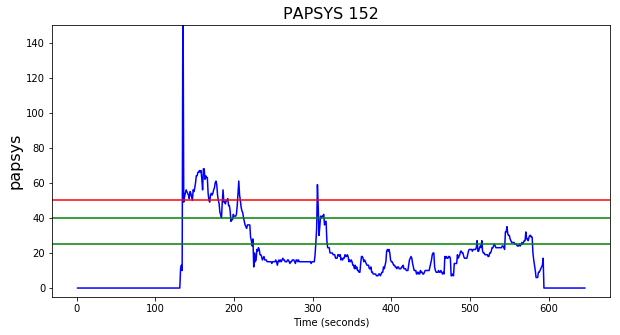

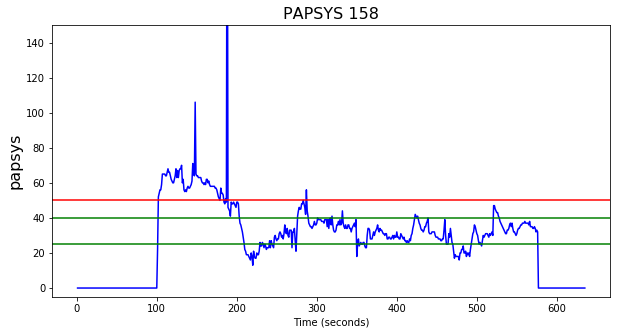

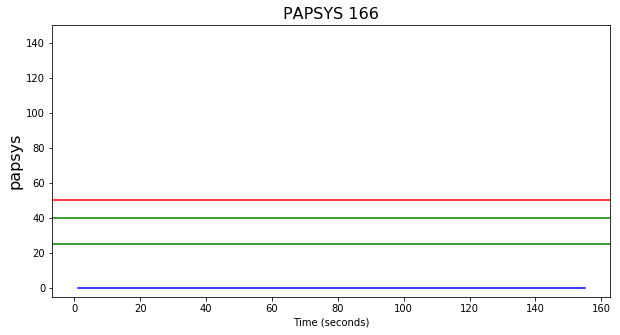

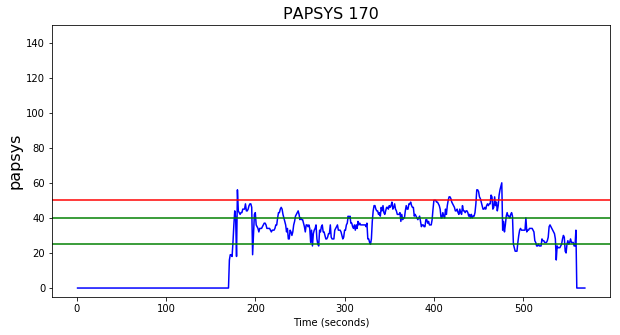

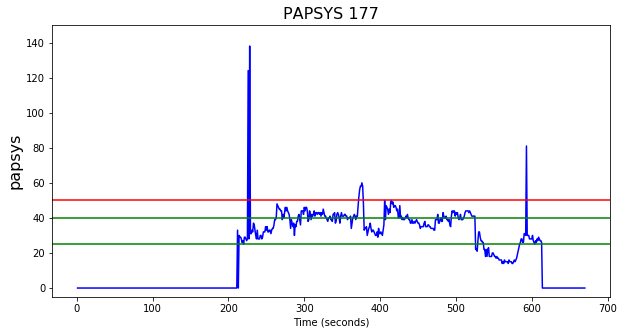

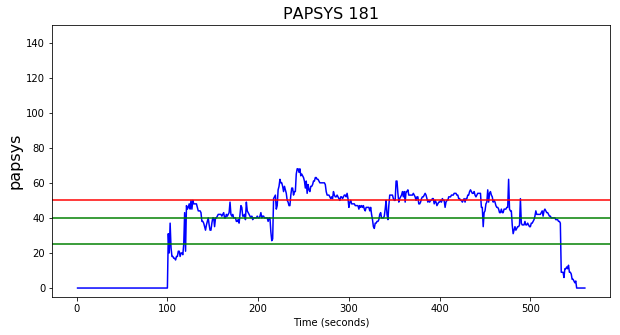

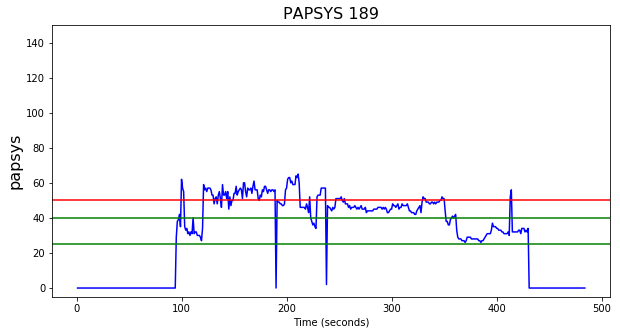

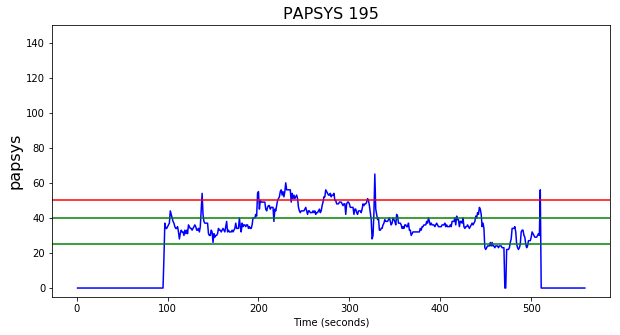

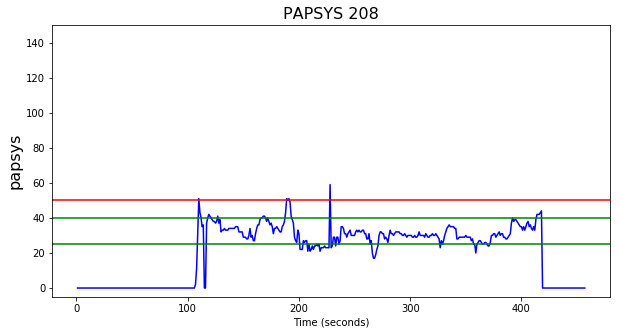

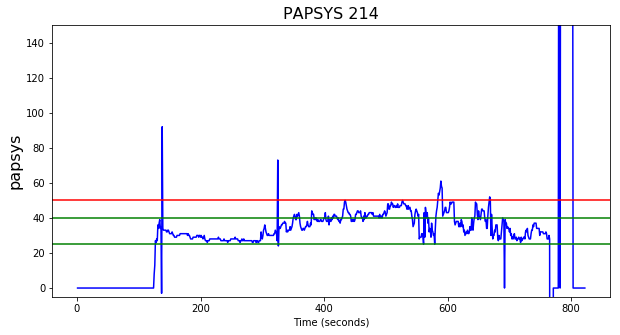

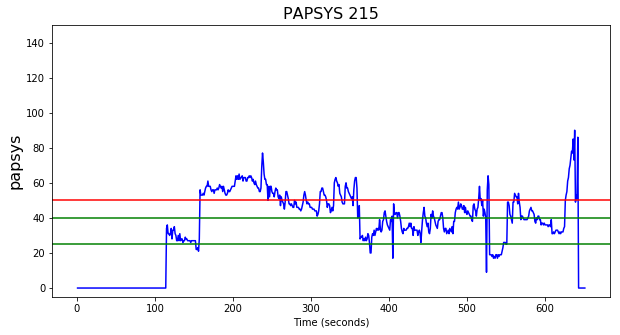

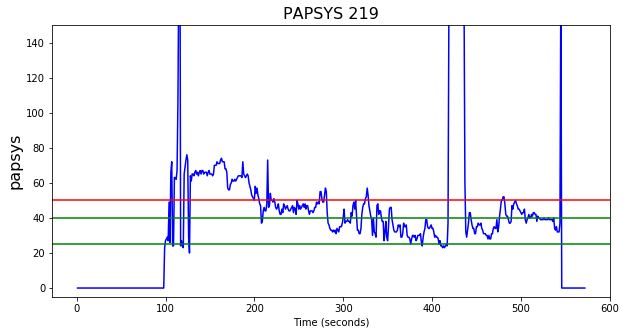

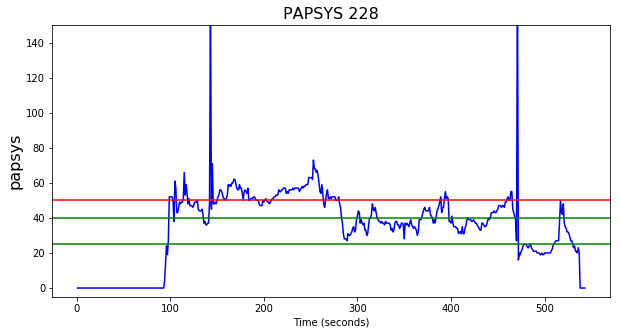

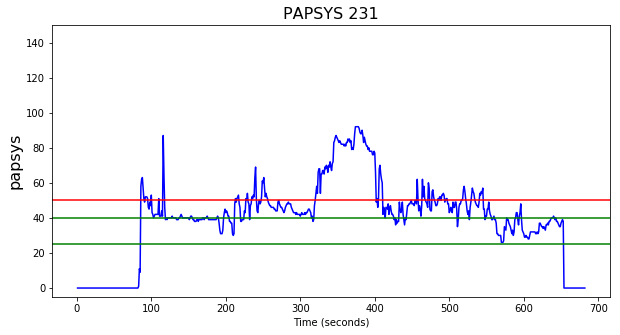

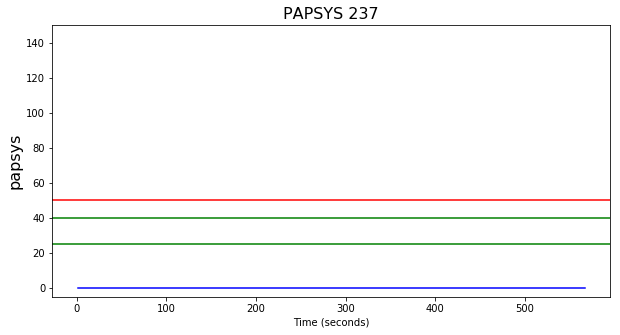

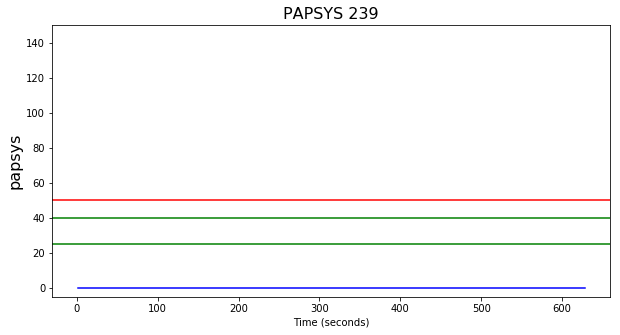

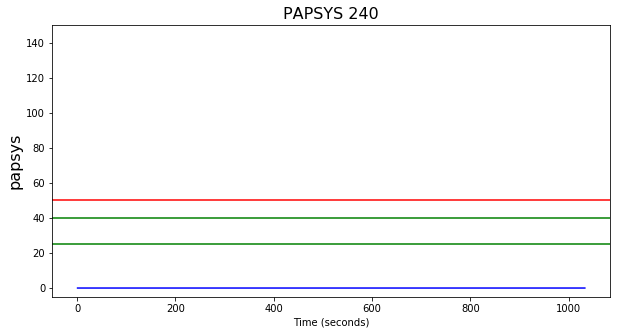

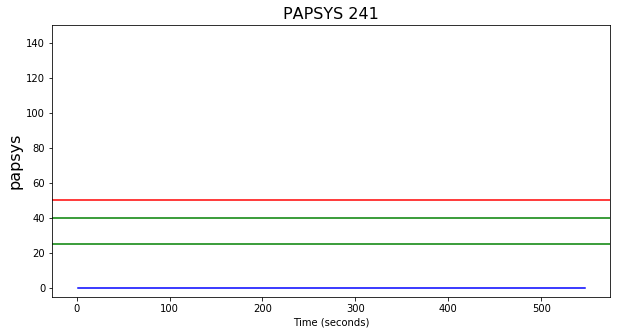

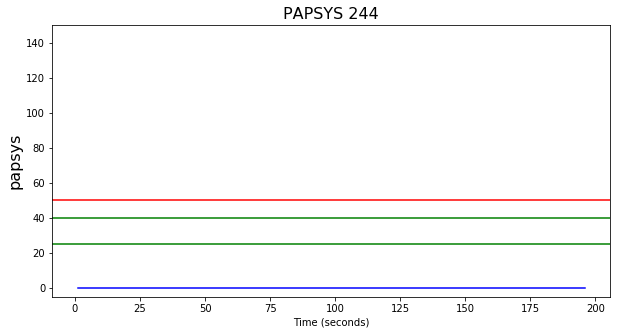

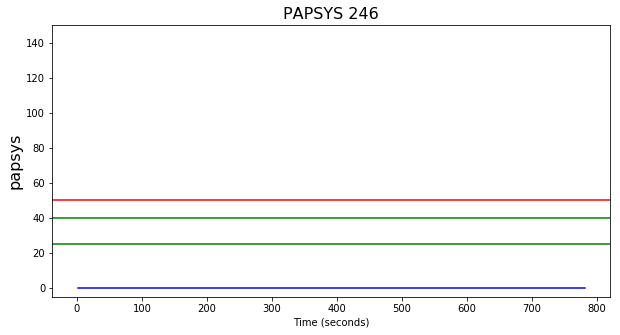

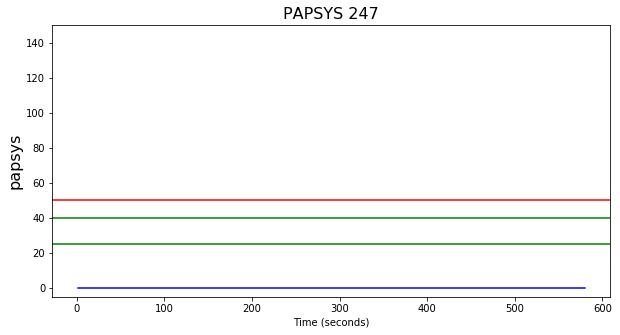

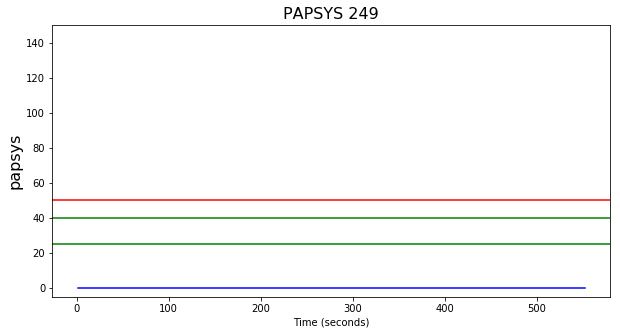

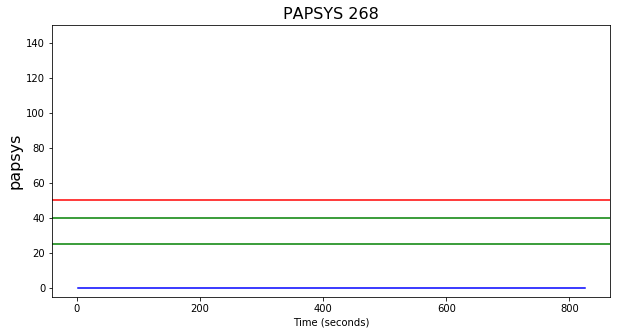

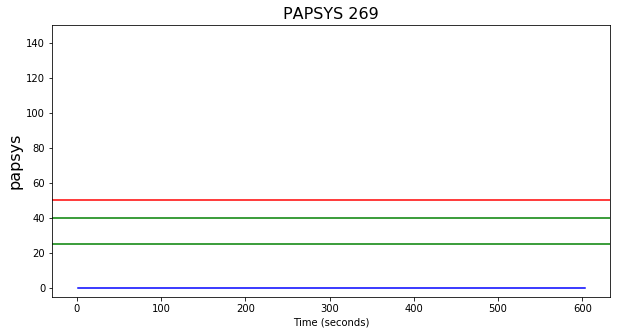

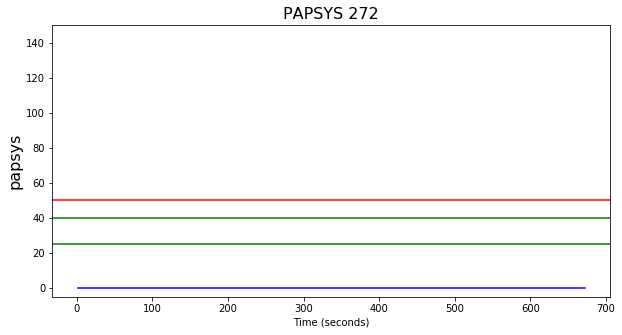

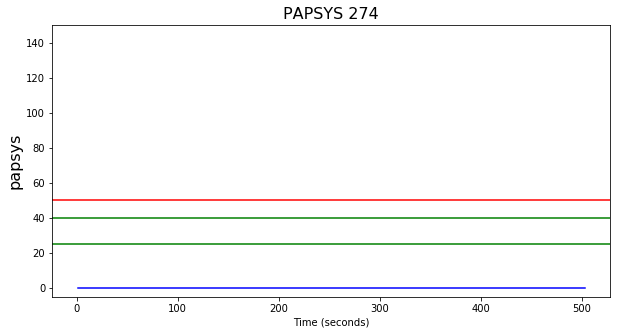

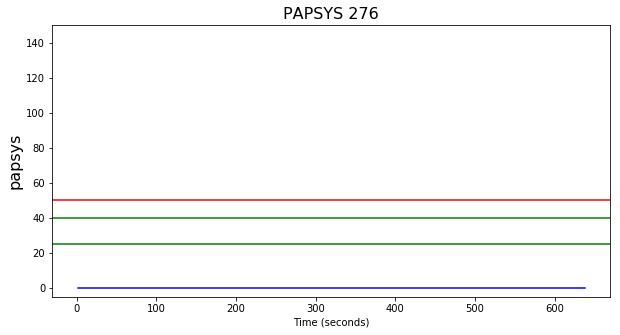

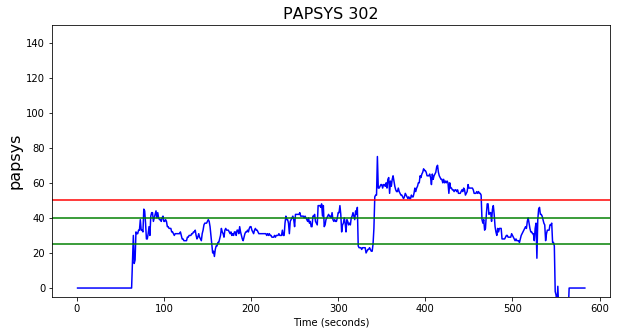

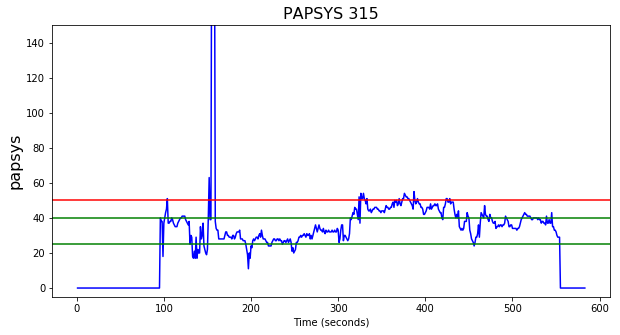

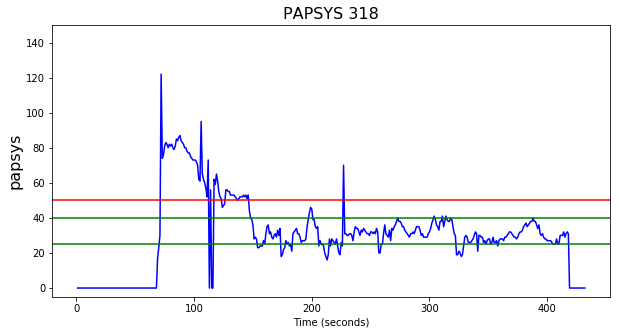

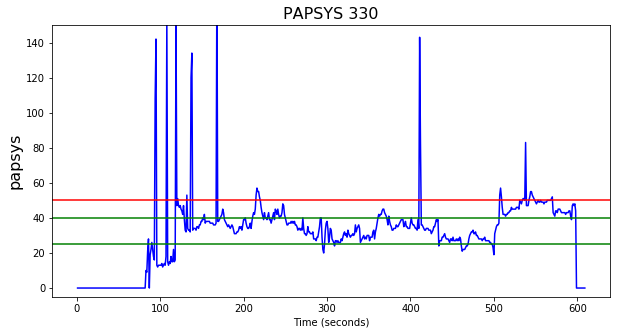

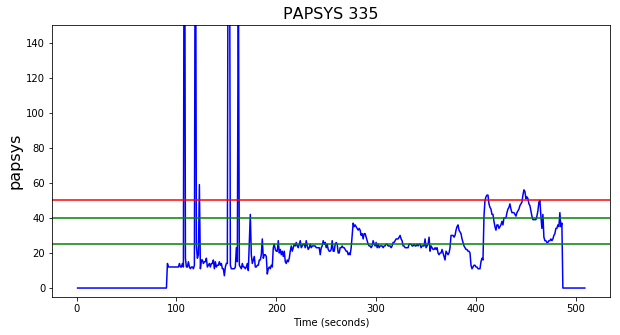

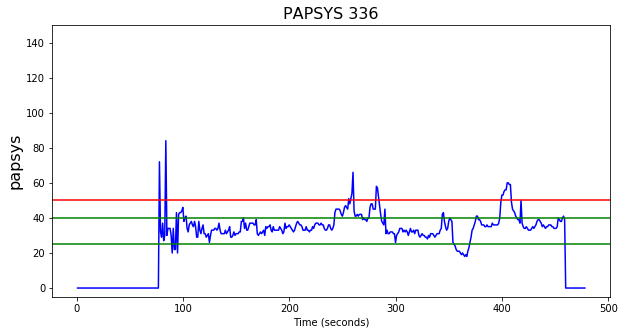

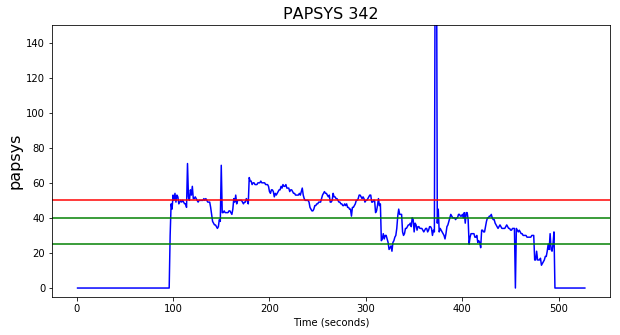

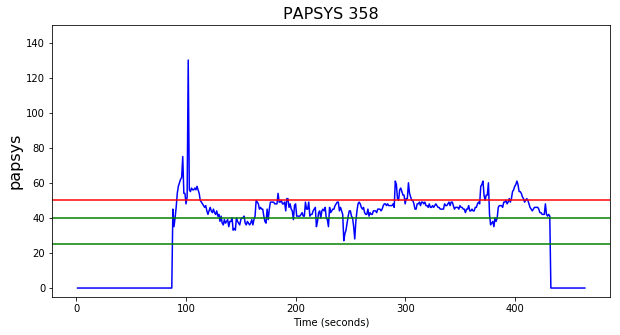

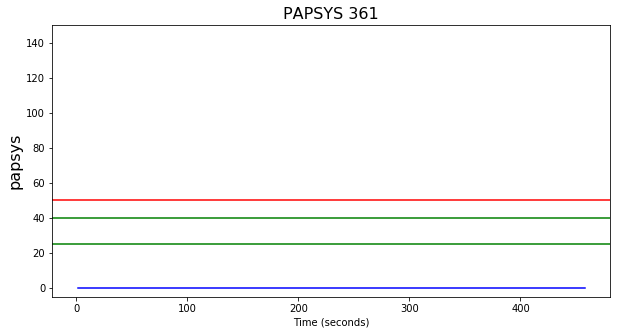

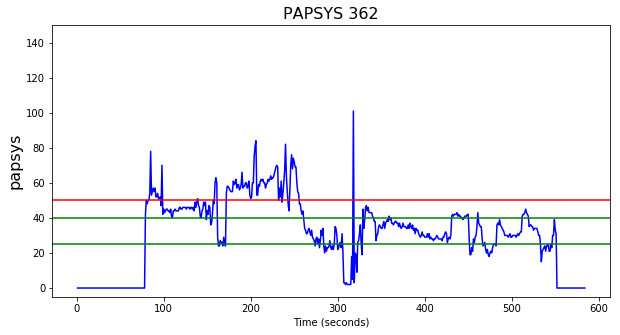

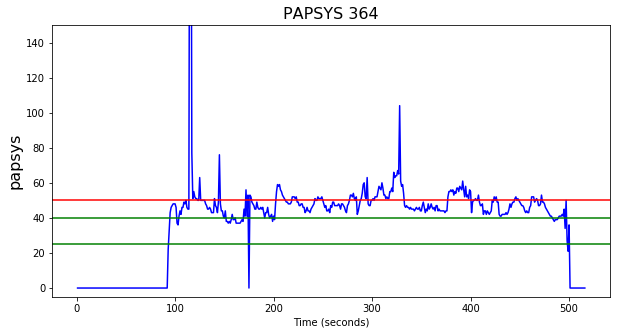

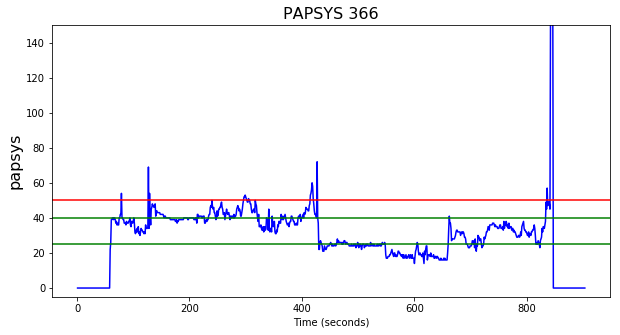

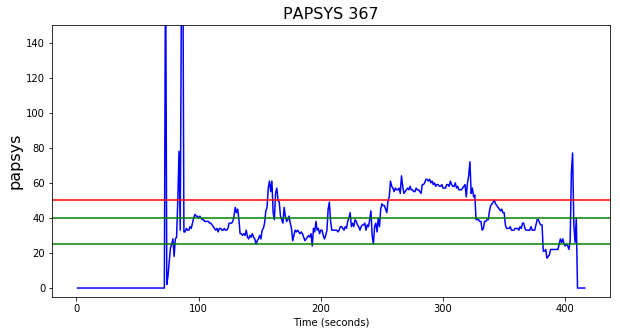

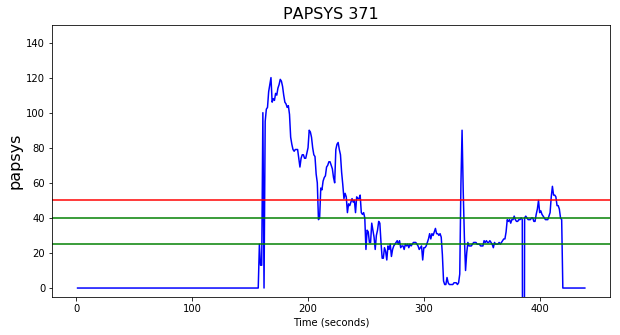

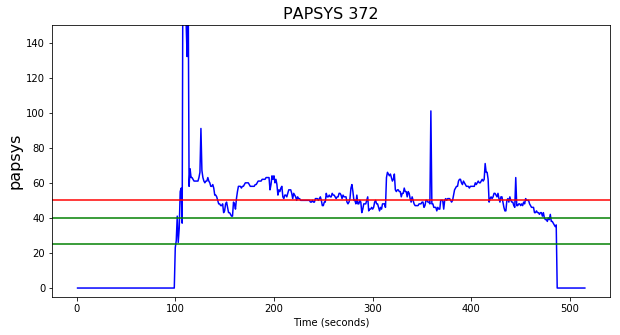

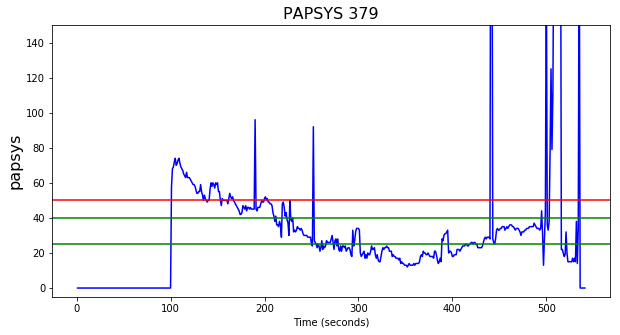

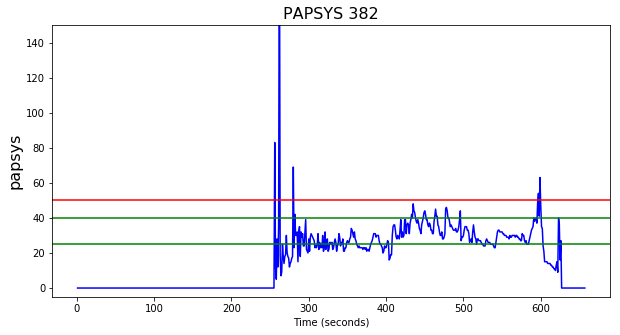

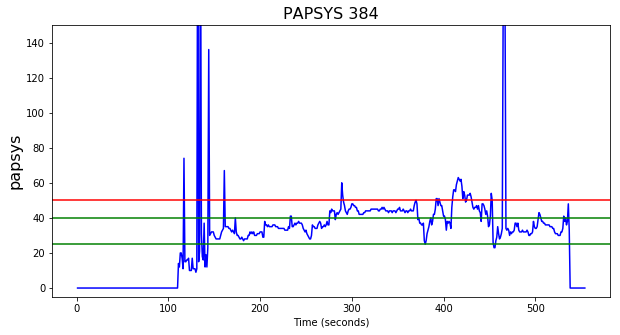

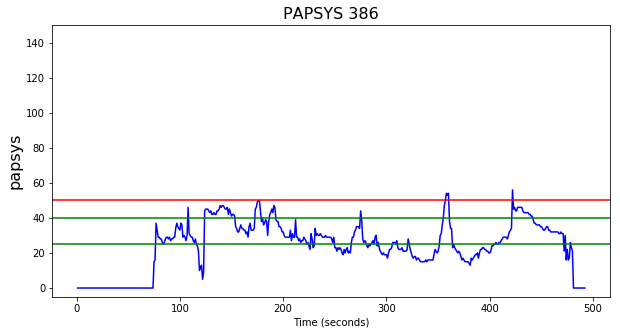

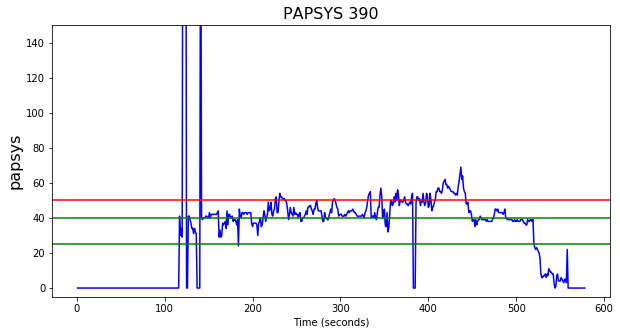

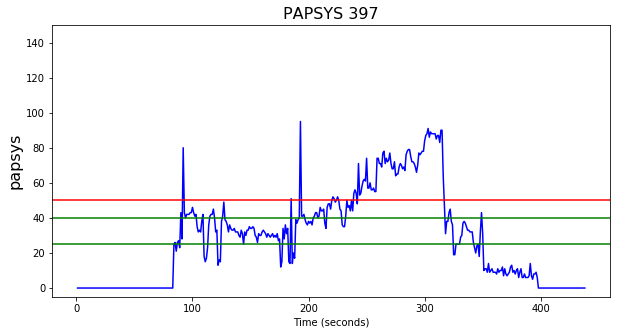

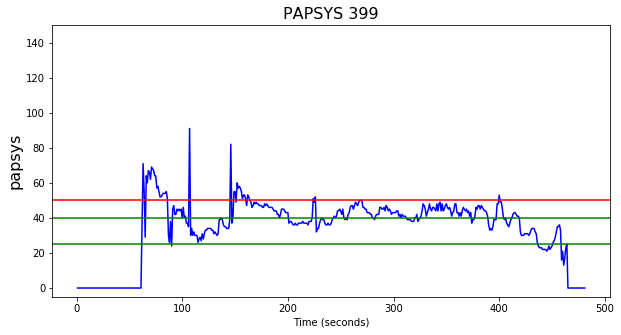

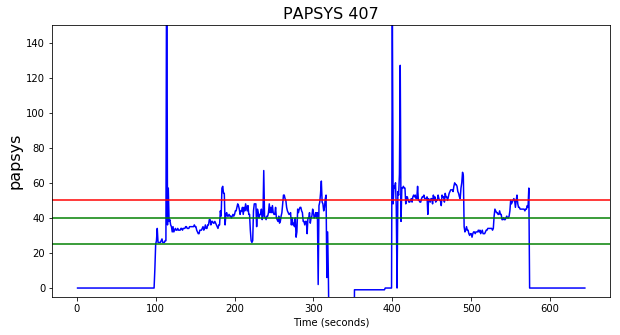

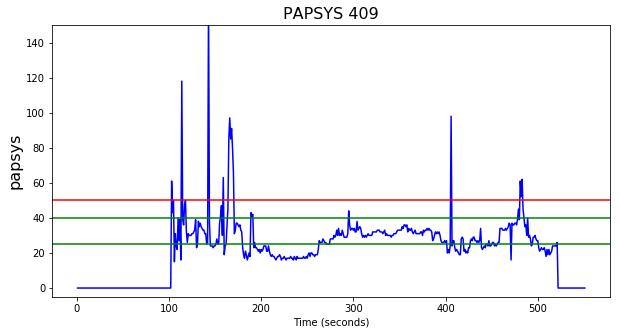

In [37]:
for id_ in dataf_T_1_0.index:
    plt.figure(figsize=(10, 5))
    plt.title("PAPSYS %d"%id_, fontsize=16)
    plt.plot(dataf_T_1_0.columns, dataf_T_1_0.loc[id_,], color='blue')
    plt.xlabel('Time (seconds)')
    plt.ylim(-5,150)
    plt.ylabel('papsys', fontsize=16)
    plt.axhline(25, color='green')
    plt.axhline(40, color='green')
    plt.axhline(50, color='red')

In [114]:
#2/ immediate_extubation = 1 & secondary_intubation = 1

In [39]:
dataf_T_1_1 = dataf_T[(dataf_T['immediate_extubation']==1) & (dataf_T['secondary_intubation']==1)]
dataf_T_1_1.drop(['debut','duree', 'fin', 'immediate_extubation', 'secondary_intubation'], axis=1, inplace=True)
dataf_T_1_1.set_index('id_patient', inplace=True)

/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


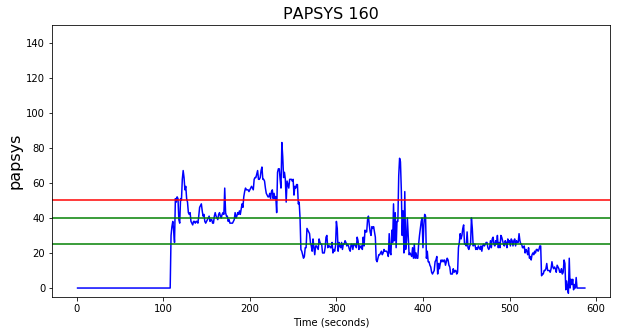

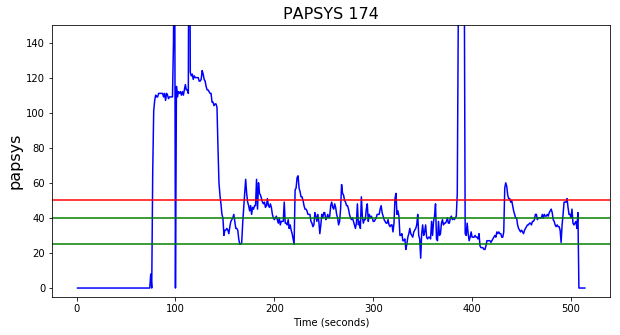

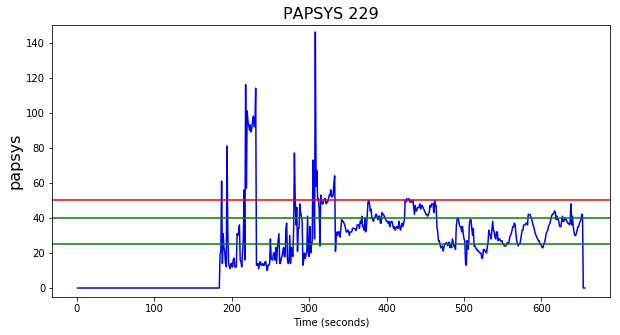

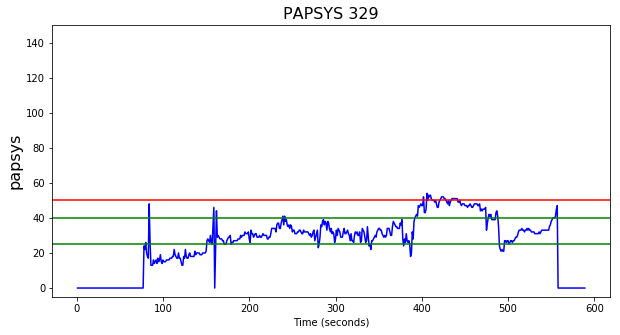

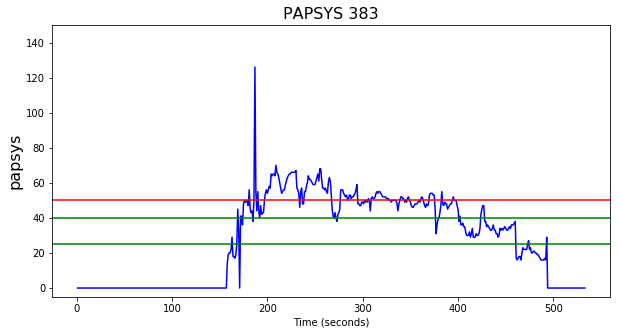

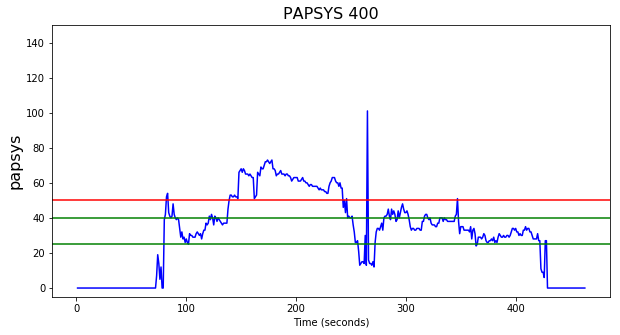

In [41]:
for id_ in dataf_T_1_1.index:
    plt.figure(figsize=(10, 5))
    plt.title("PAPSYS %d"%id_, fontsize=16)
    plt.plot(dataf_T_1_1.columns, dataf_T_1_1.loc[id_,], color='blue')
    plt.xlabel('Time (seconds)')
    plt.ylim(-5,150)
    plt.ylabel('papsys', fontsize=16)
    plt.axhline(25, color='green')
    plt.axhline(40, color='green')
    plt.axhline(50, color='red')

In [118]:
#3/ immediate_extubation = 0 & secondary_intubation = 0

In [42]:
dataf_T_0_0 = dataf_T[(dataf_T['immediate_extubation']==0) & (dataf_T['secondary_intubation']==0)]
dataf_T_0_0.drop(['debut','duree', 'fin', 'immediate_extubation', 'secondary_intubation'], axis=1, inplace=True)
dataf_T_0_0.set_index('id_patient', inplace=True)

/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


/home/karine/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


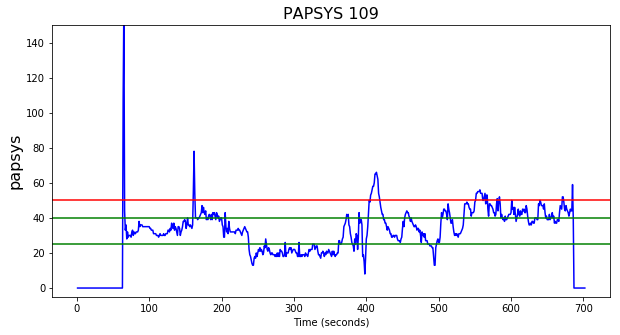

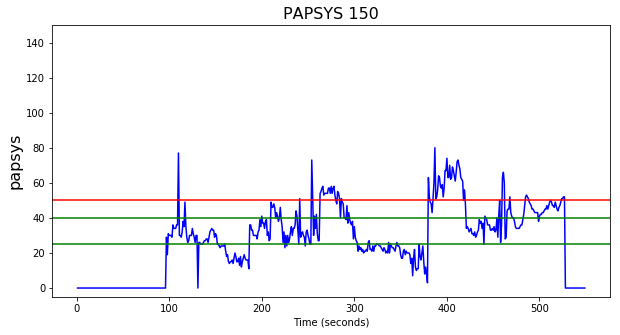

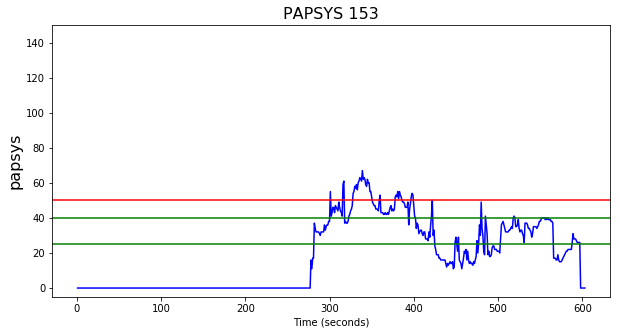

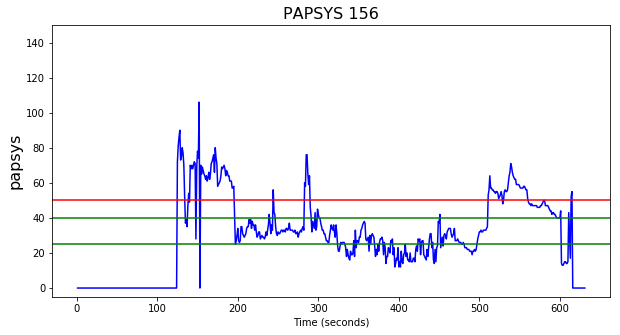

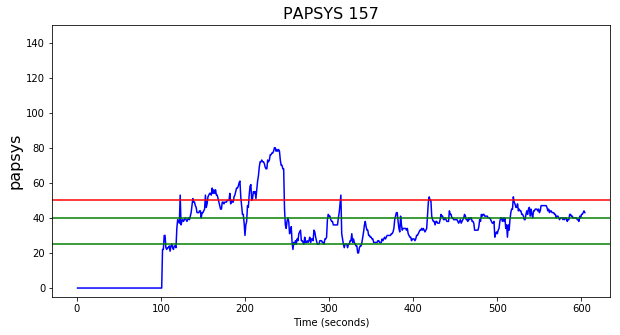

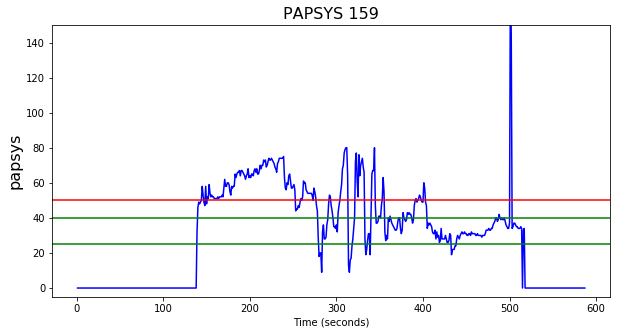

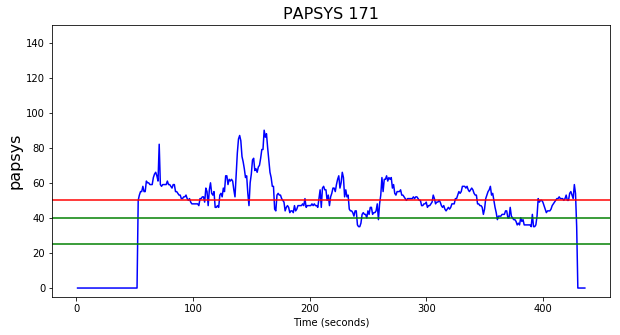

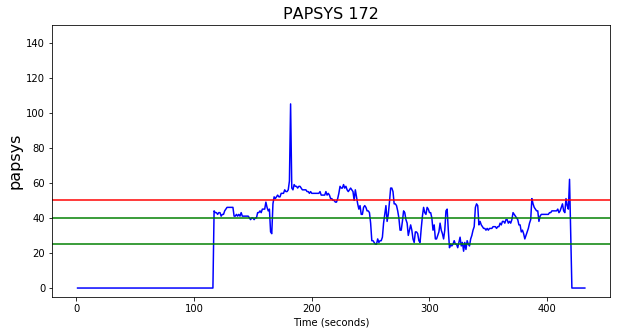

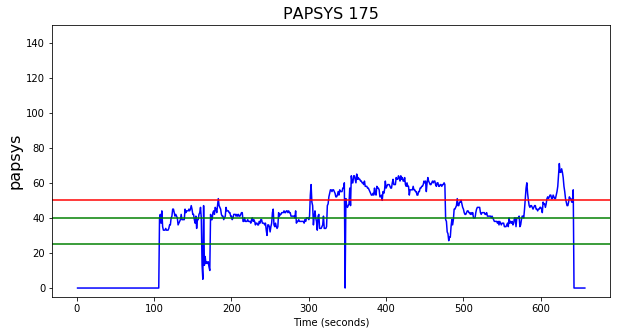

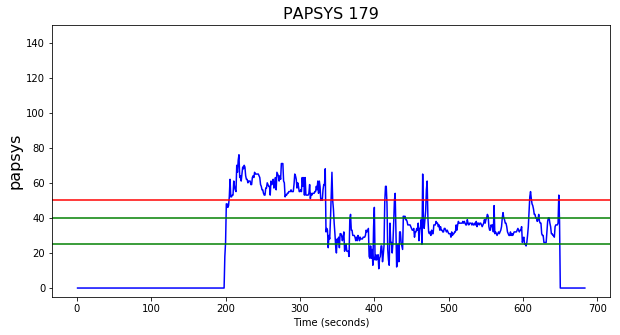

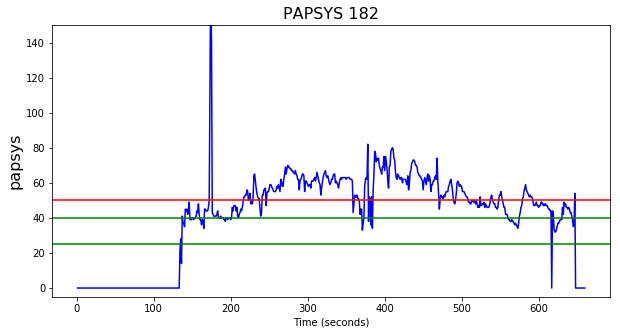

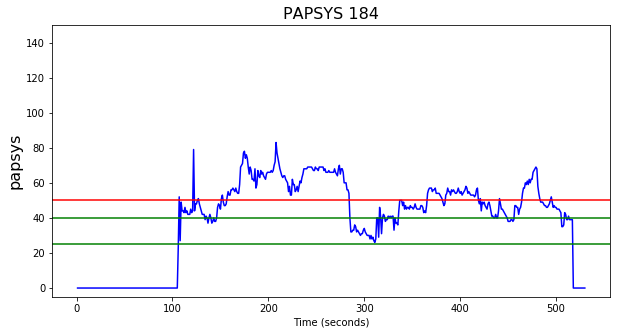

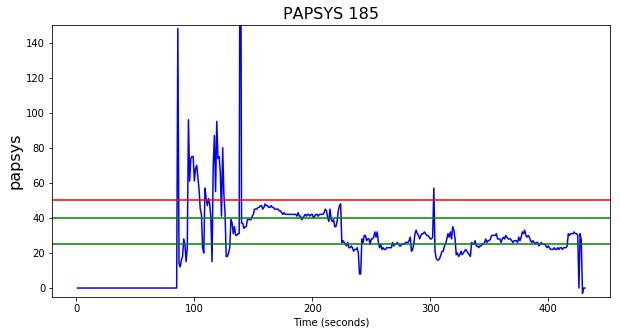

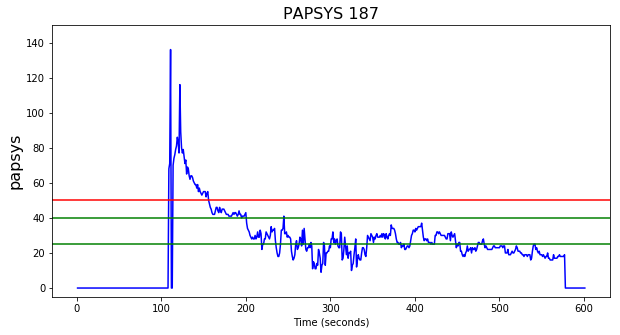

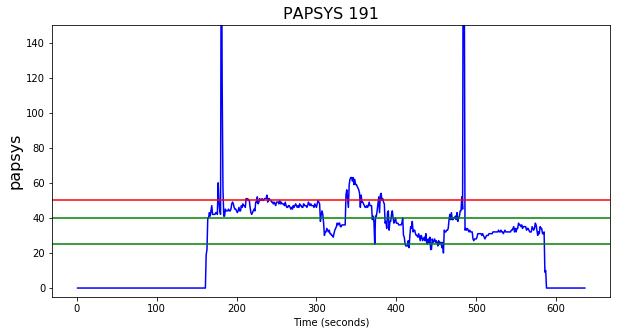

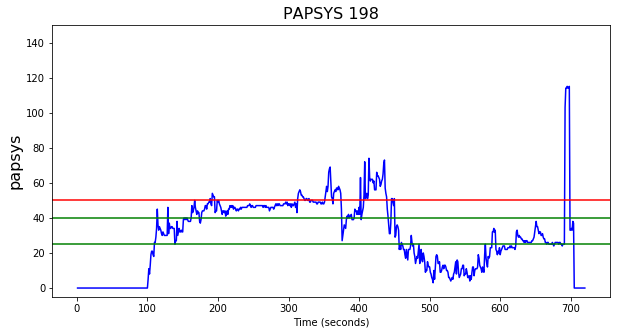

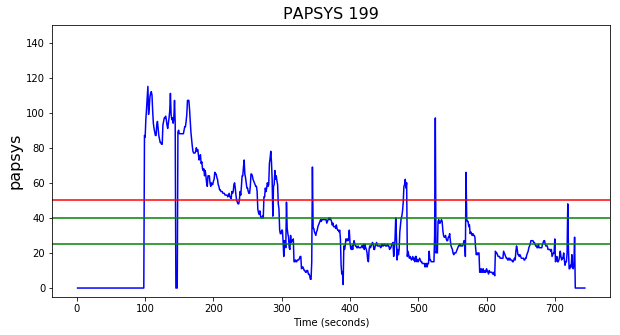

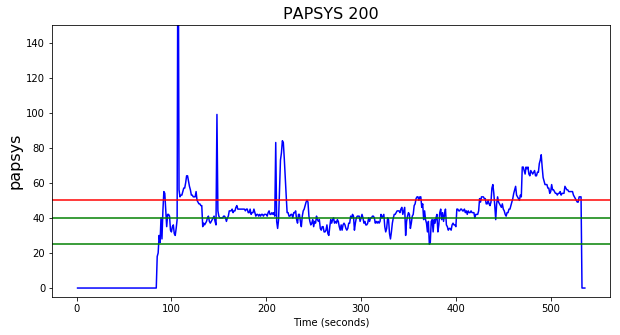

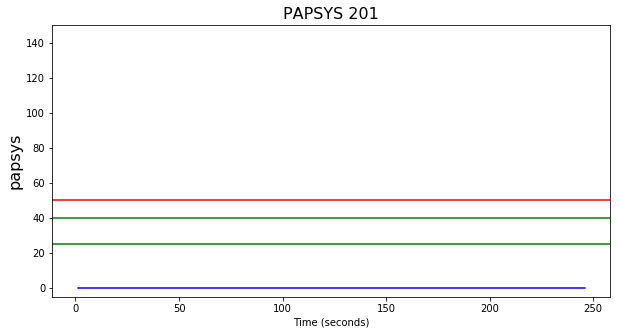

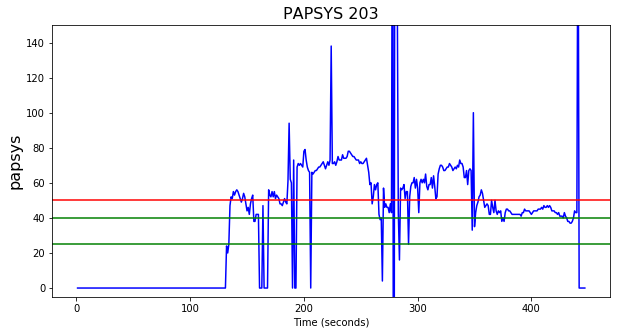

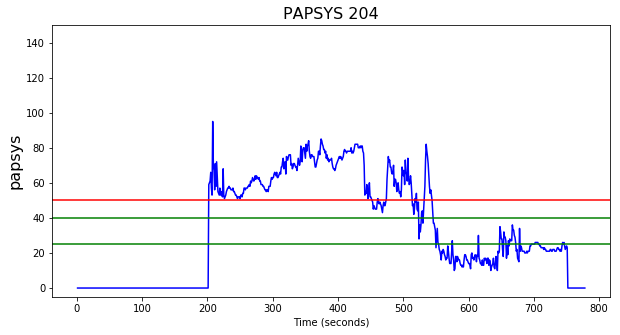

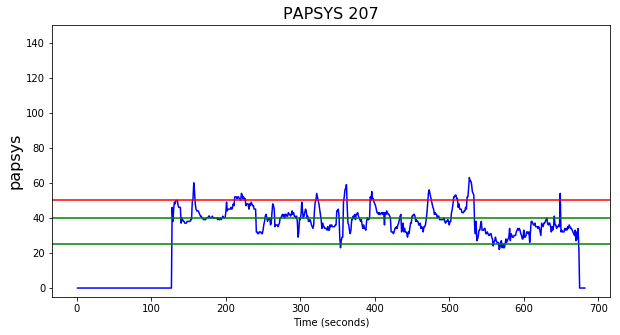

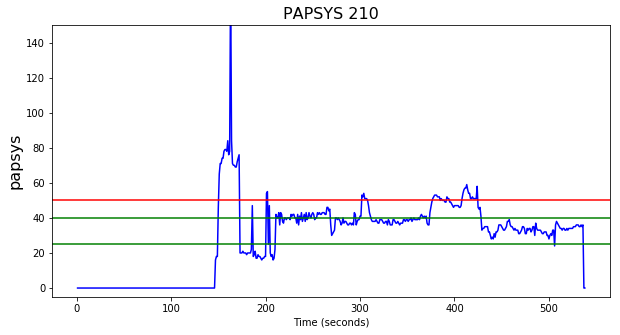

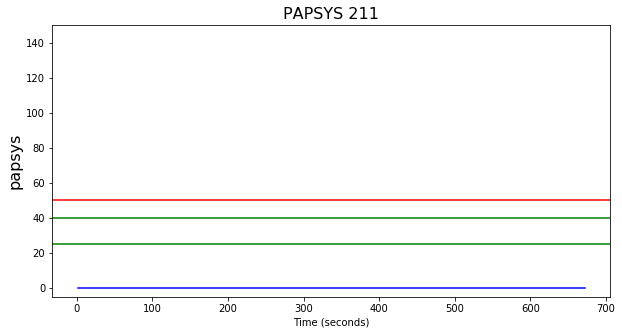

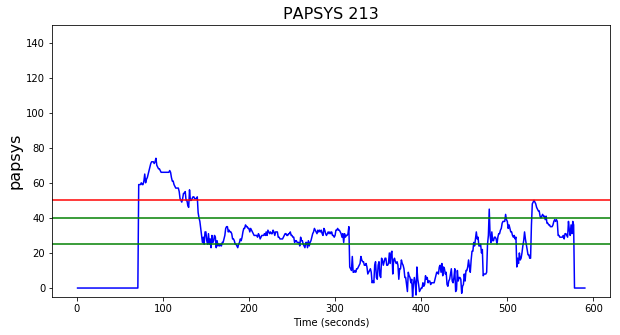

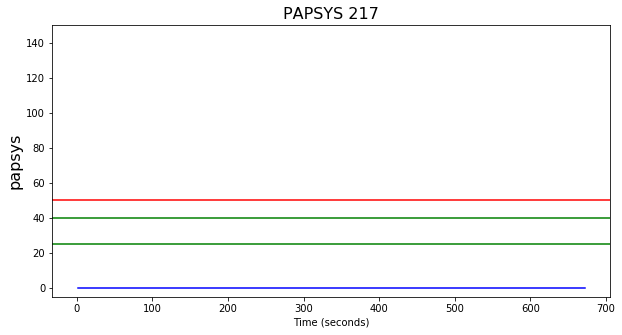

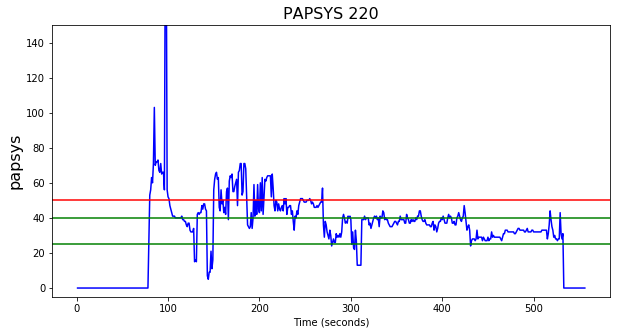

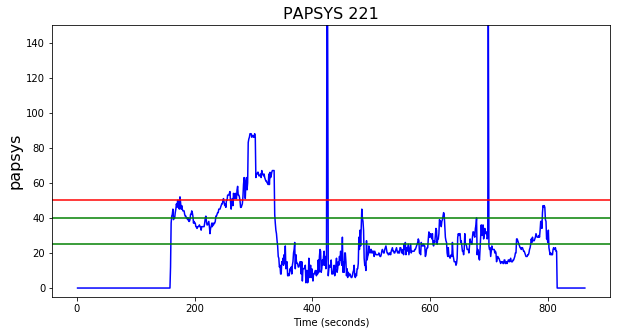

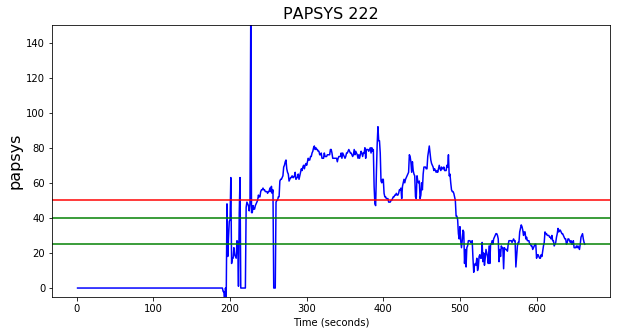

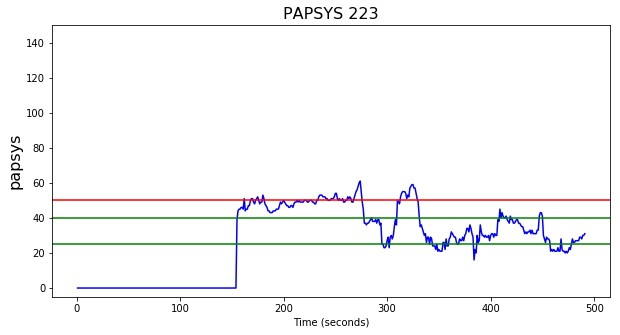

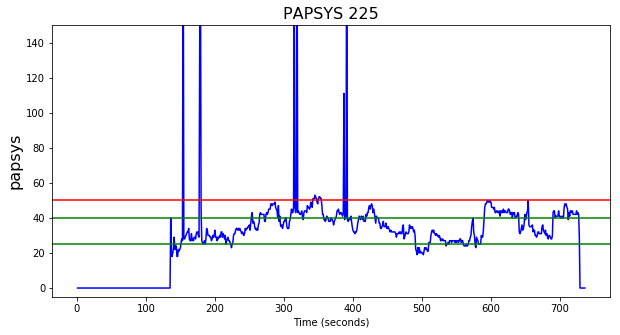

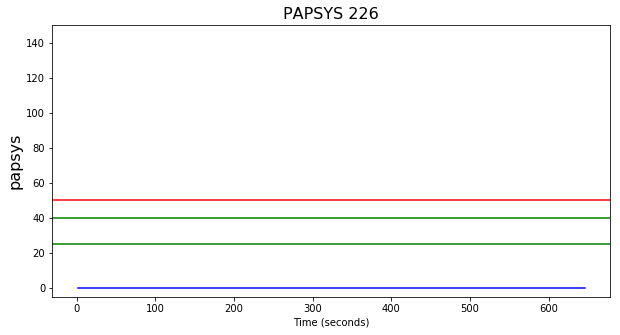

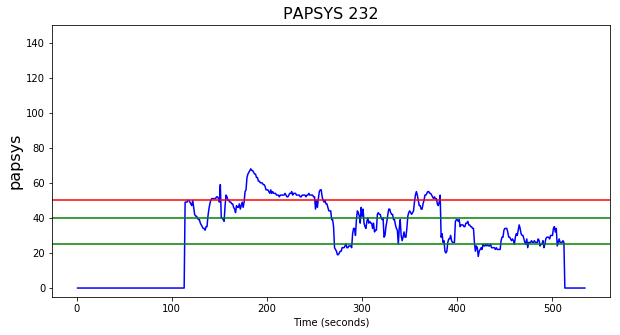

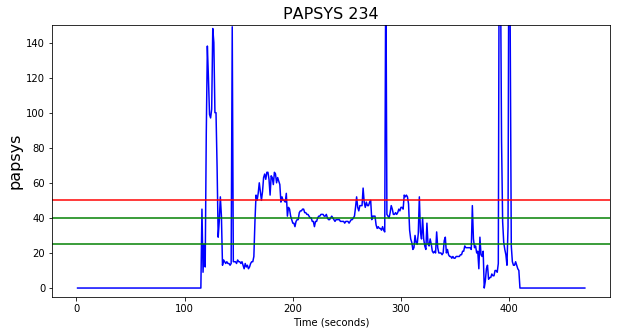

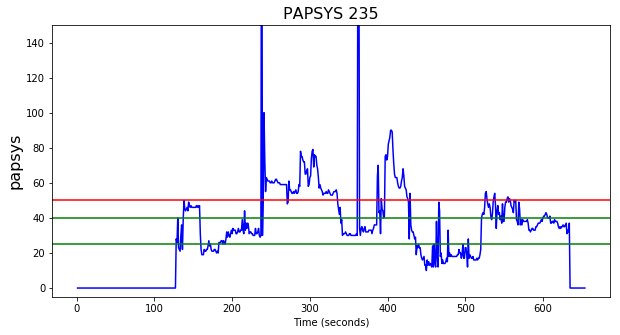

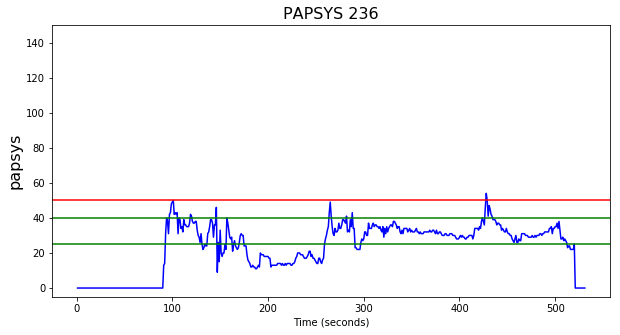

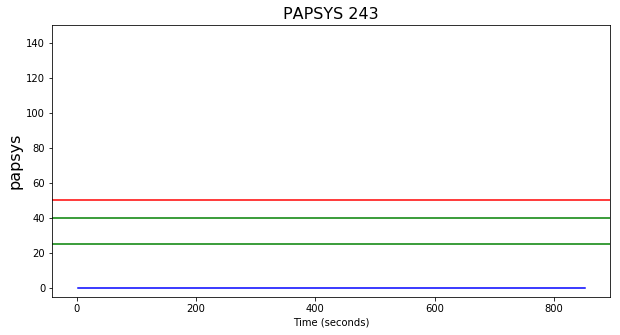

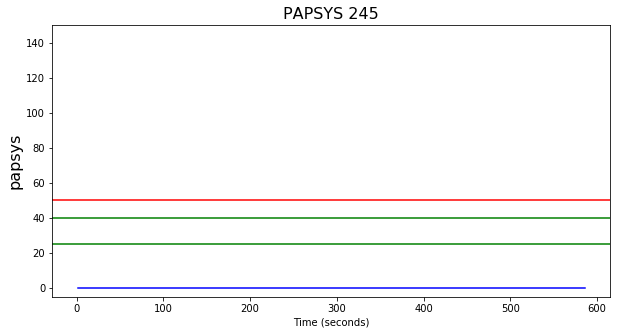

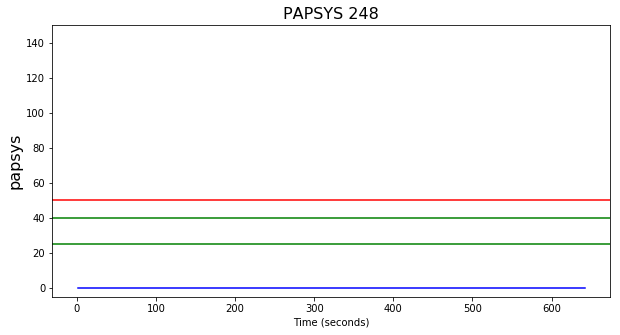

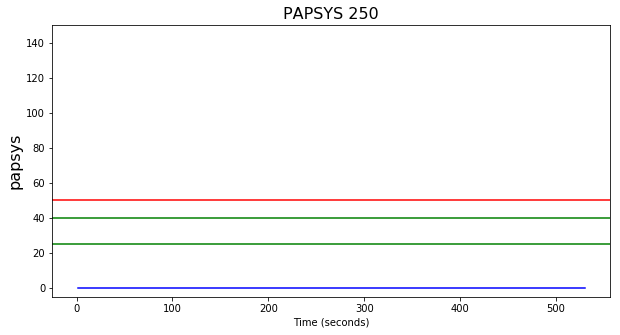

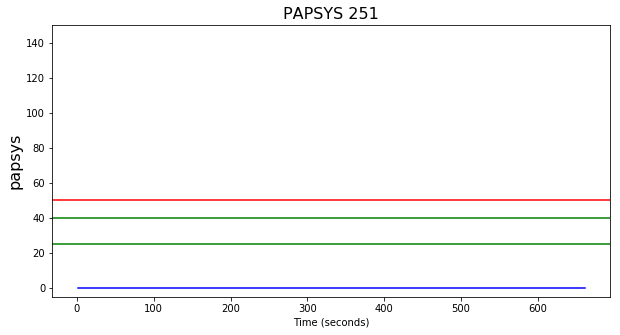

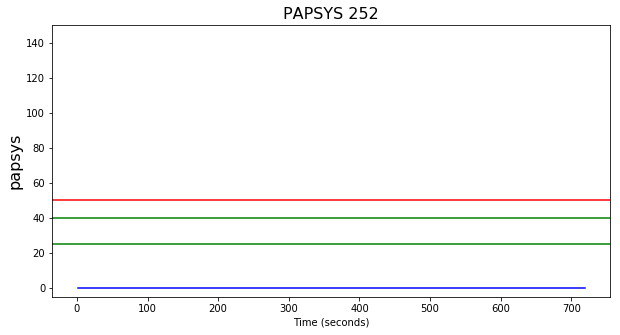

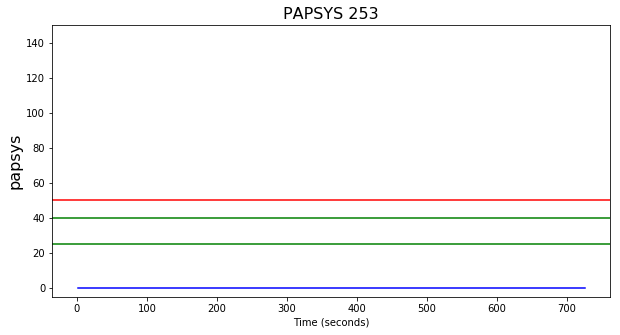

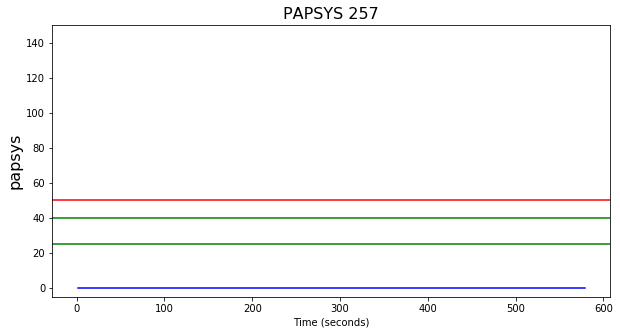

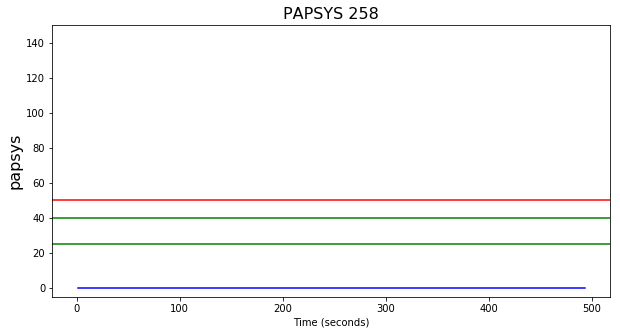

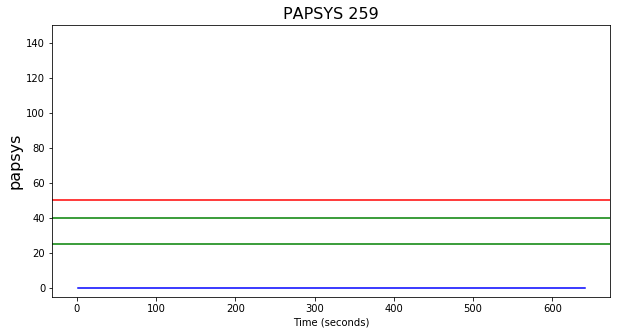

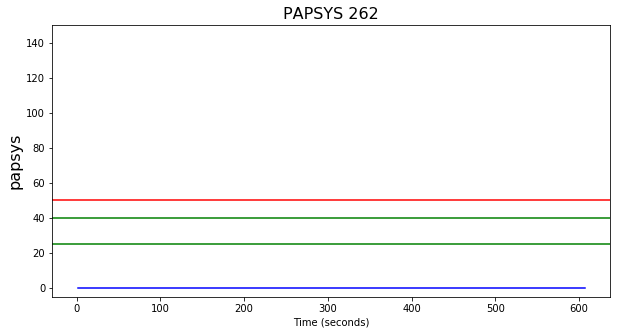

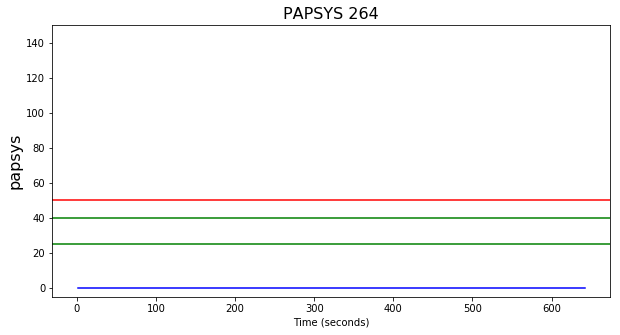

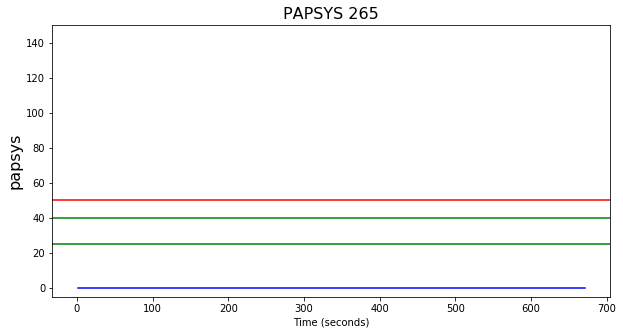

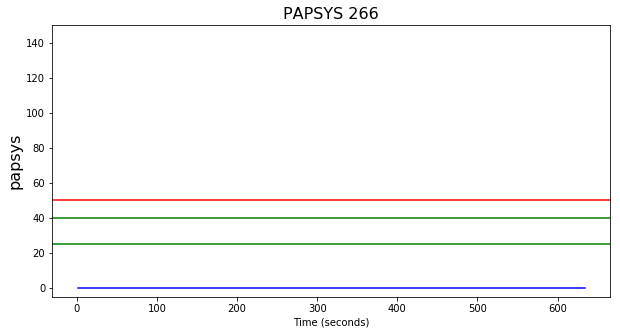

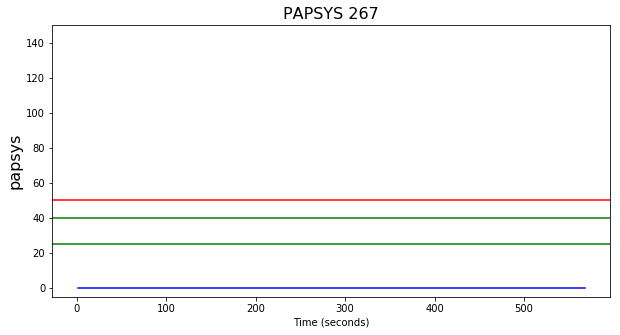

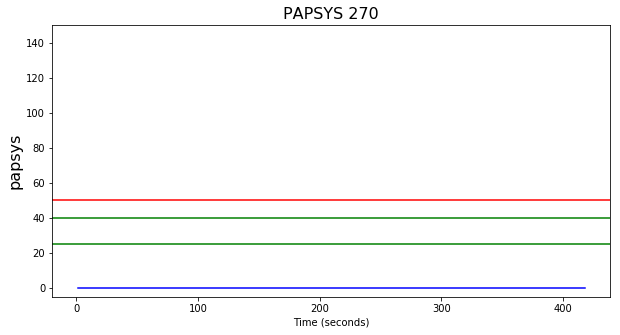

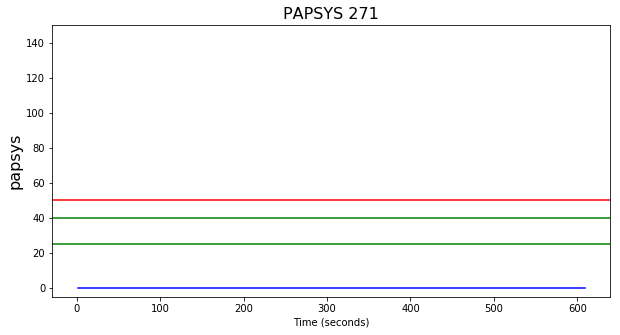

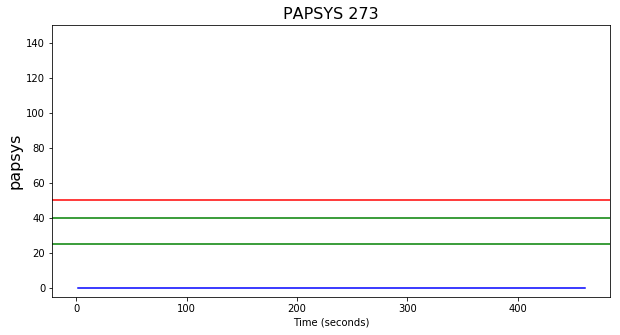

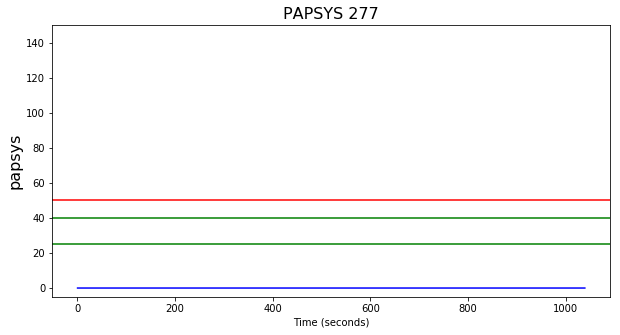

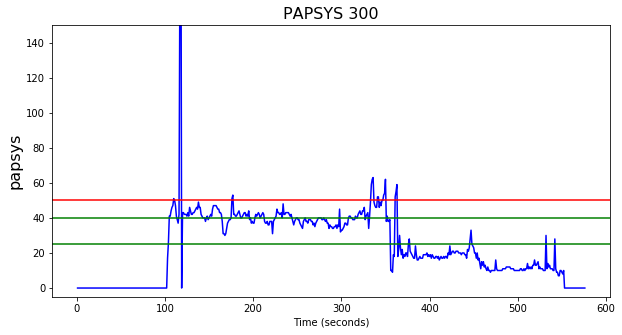

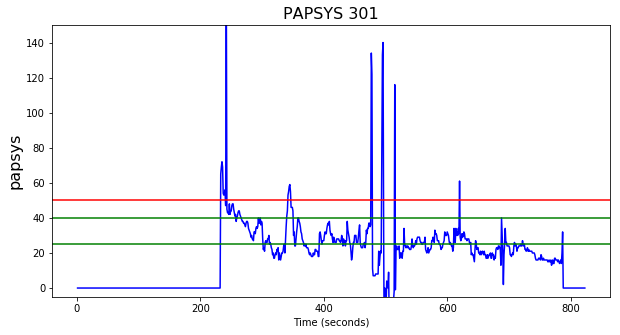

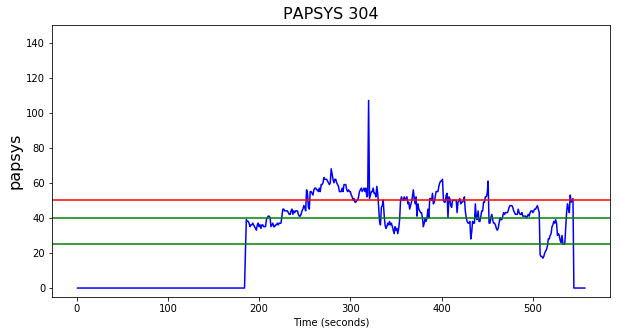

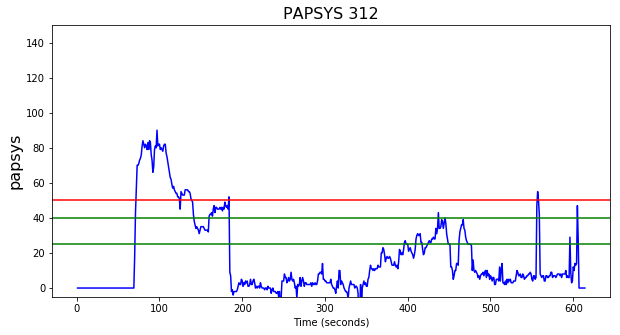

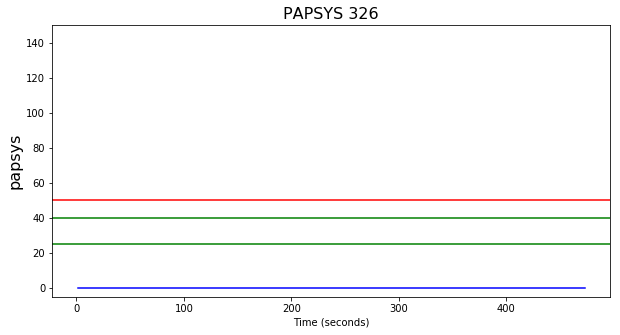

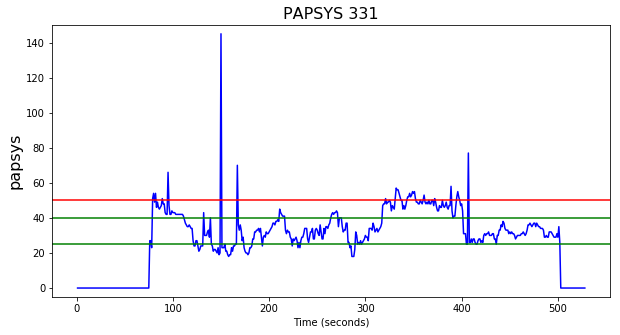

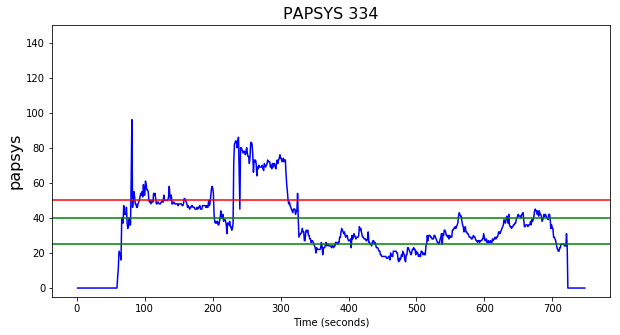

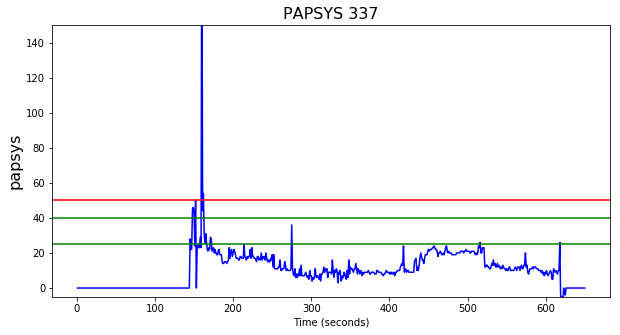

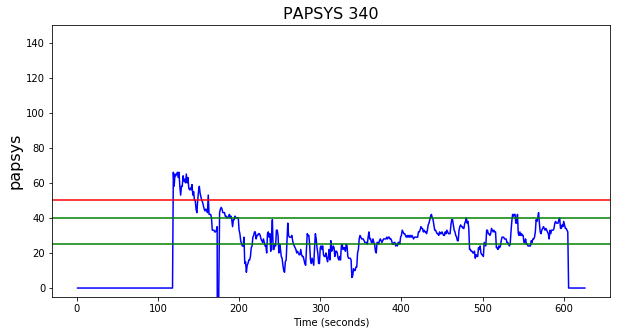

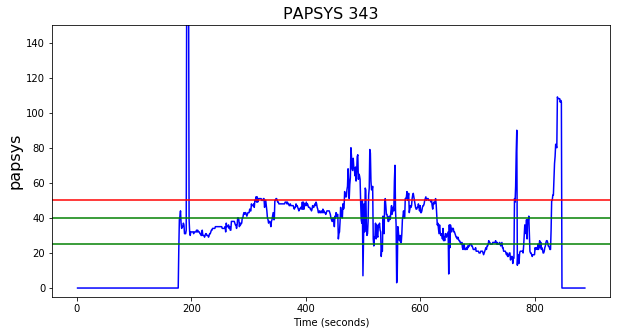

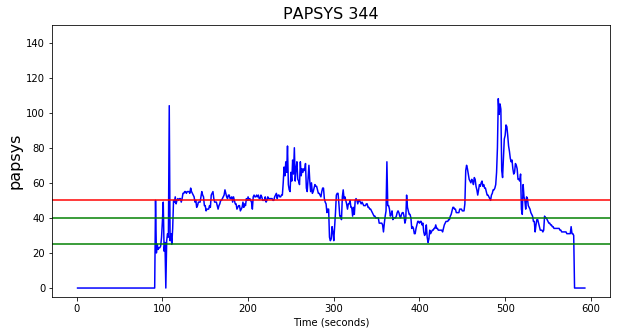

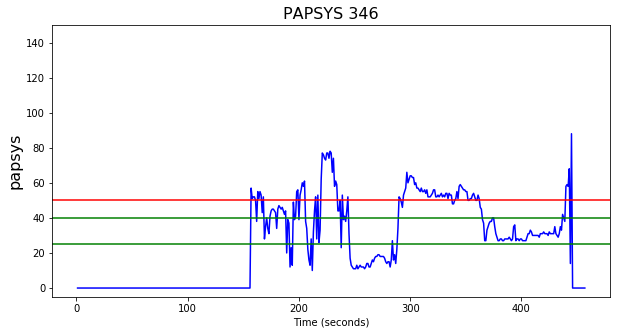

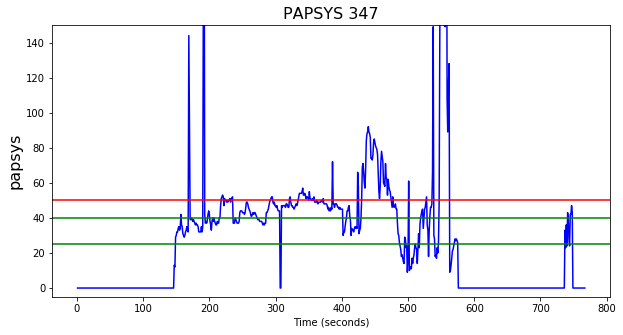

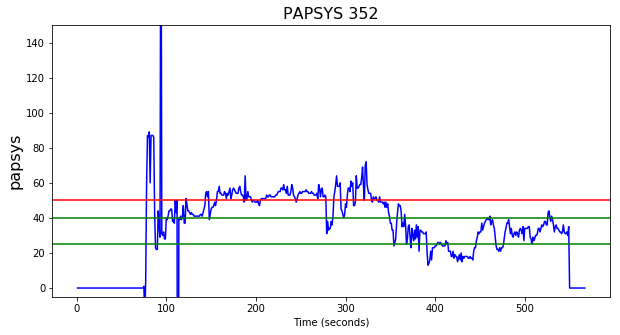

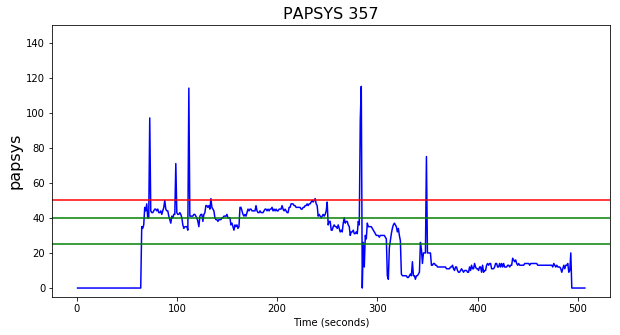

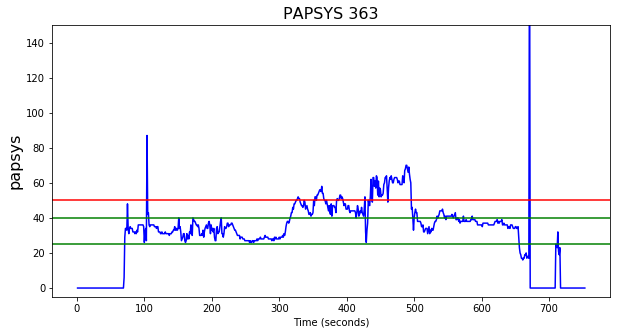

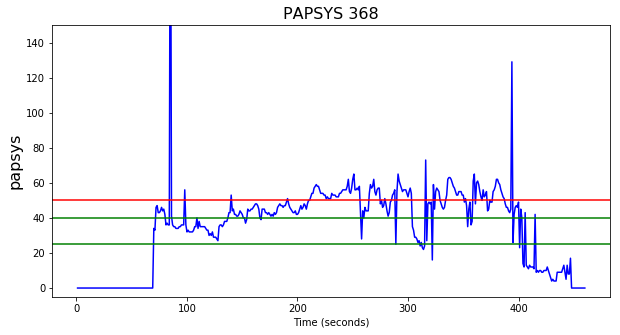

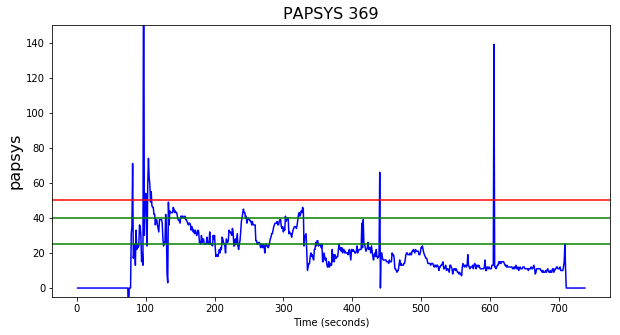

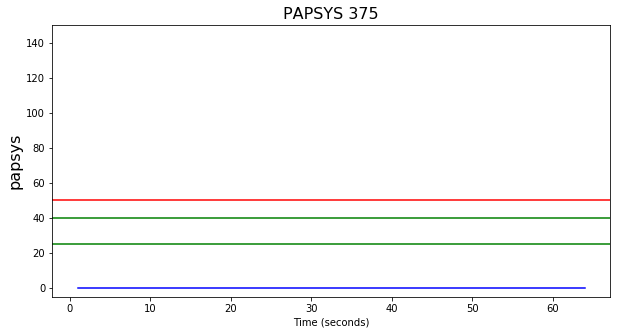

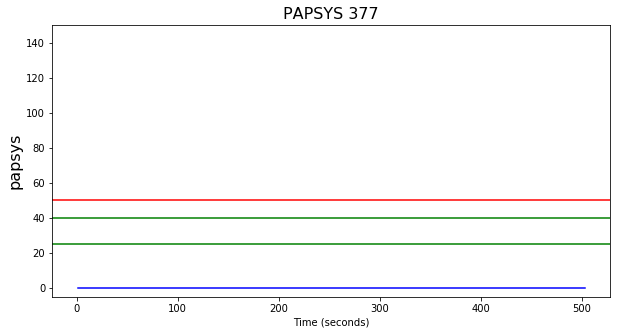

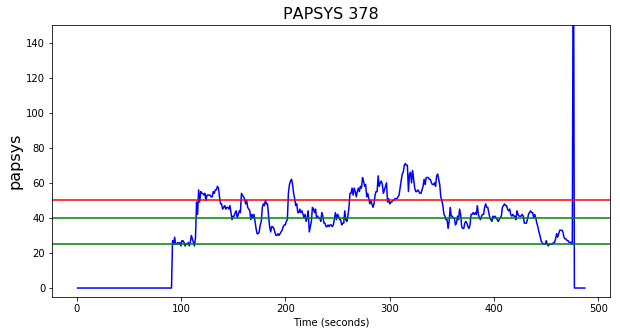

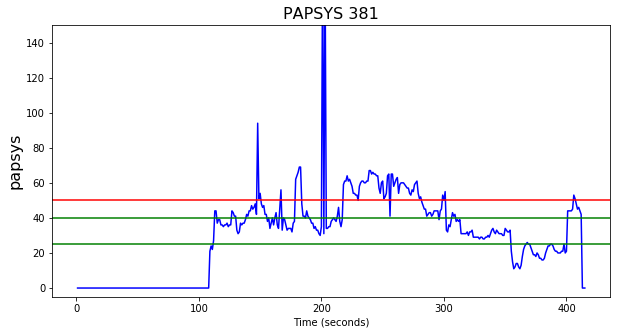

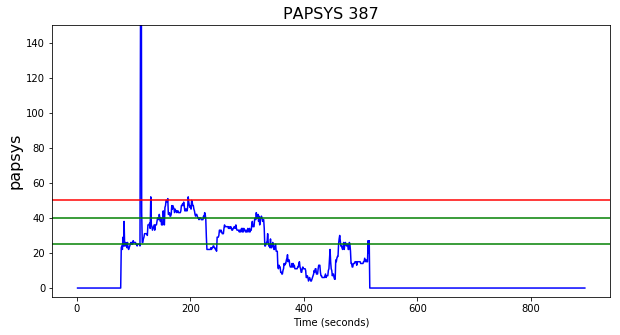

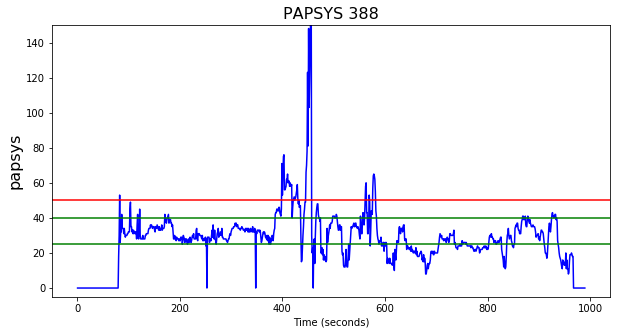

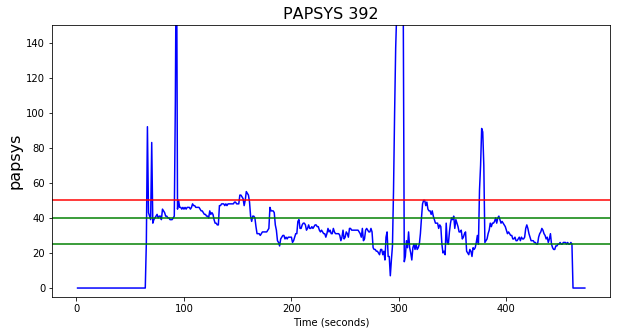

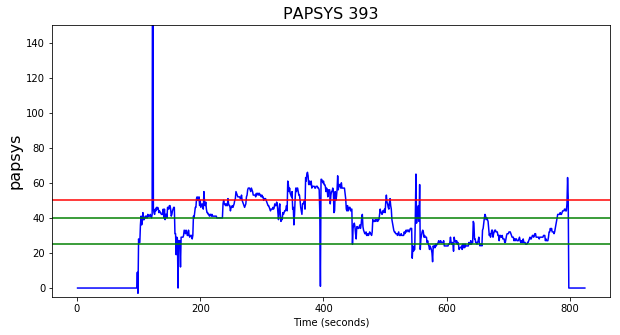

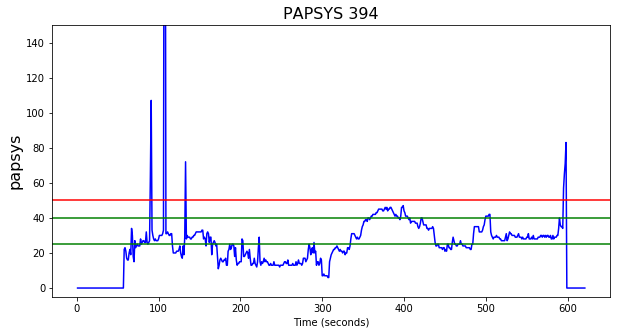

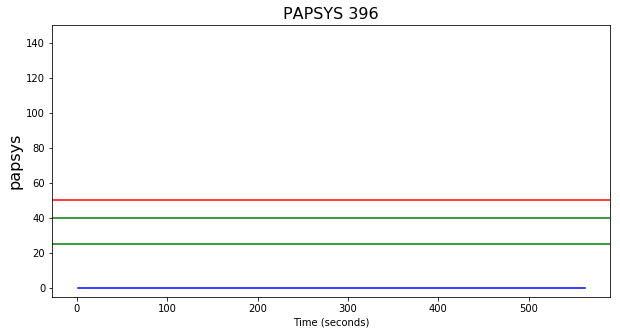

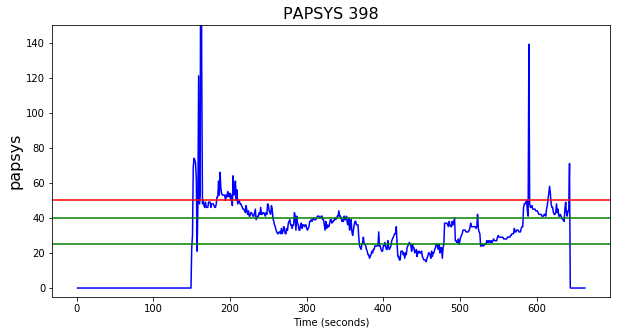

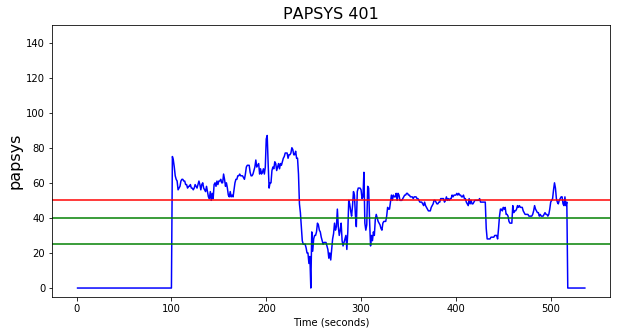

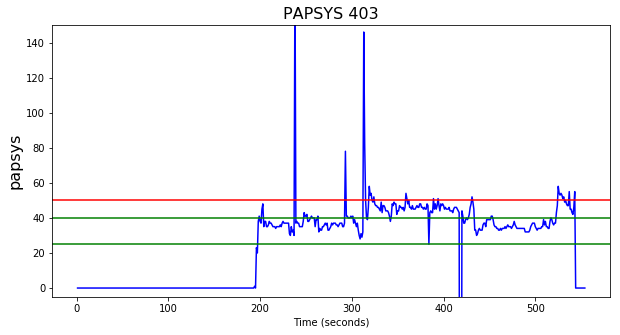

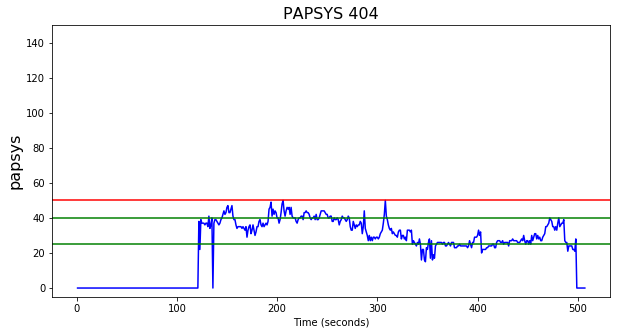

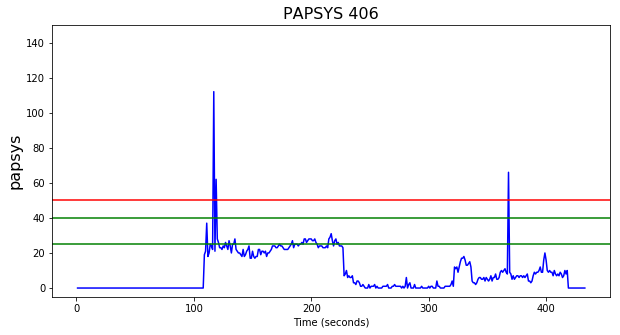

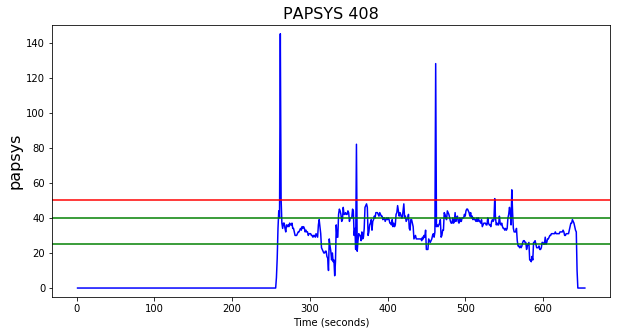

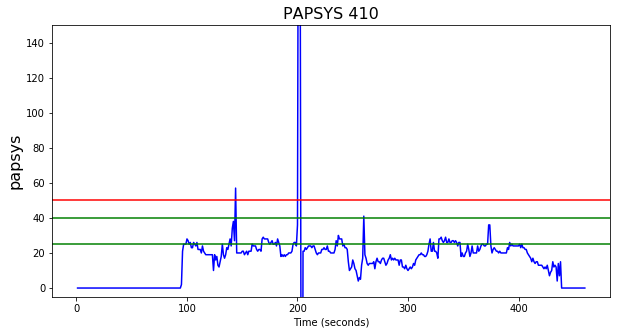

In [43]:
for id_ in dataf_T_0_0.index:
    plt.figure(figsize=(10, 5))
    plt.title("PAPSYS %d"%id_, fontsize=16)
    plt.plot(dataf_T_0_0.columns, dataf_T_0_0.loc[id_,], color='blue')
    plt.xlabel('Time (seconds)')
    plt.ylim(-5,150)
    plt.ylabel('papsys', fontsize=16)
    plt.axhline(25, color='green')
    plt.axhline(40, color='green')
    plt.axhline(50, color='red')